###**LOTTE MART - BA TEST**

>**1. BUSINESS PROBLEM**

**Domain:** Data is given in 2 files: BA-test-part1, BA-test-part2. Try to make a summary laying out important insights about operations health in retail

* General evaluation of Speed L 's sales situation in the first 2 weeks of August?
* Which store is selling well and good at category? Specifically which product?
* Which major category (cate-1) is best selling? Detailed analysis for cate-4 and best-selling products in the past time? Give comments on consumer trends (divided into 3 regions: North, Middle, South)
* The average of order value and the average value of the product categories ? What are the differences between various product categories?
* For each type of product, how many quantity customers usually buy for 1 purchase?
* Based on above analyzed data, make an assessment of the forecast to sell for the next 2 weeks


>**2. EXPLORATORY DATA ANALYSIS**

>>*2.1  Overview Data* 

In [1]:
# Import libraries and upload file
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
import seaborn as sns
# Option to specify the default size of plots by seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# Install PyDrive, modules. Authenticate and create the PyDrive client
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Get the file
downloaded1 = drive.CreateFile({'id':"1zQ3tTO_tL7-9N_Q9fseSs84ln59vPpp9"})  
downloaded2 = drive.CreateFile({'id':"1ZKBd-18deAHoZrZv2JR6erM3EoqB8hNW"})
downloaded1.GetContentFile('BA-test-part1.xlsx')
downloaded2.GetContentFile('BA-test-part2.xlsx')
# Read-in the dataset 
df1=pd.read_excel('BA-test-part1.xlsx')
df2=pd.read_excel('BA-test-part2.xlsx')

In [4]:
# View top 5 records(observations) of BA-test-part-1
display(df1.head())
print('\n'*1)
print('-'*160)
print('\n'*1)
# View top 5 records(observations) of BA-test-part-2
df2.head()

,Sale dt,Str cd,Order number,Sale amt,Deliv fee,Delivery distance,Date,Cust card no.,1-cat,1-cat nm,2-Cat,2-Cat Nm,3-Cat,3-Cat Nm,4-Cat,4-Cat Nm,Prod cd,Prod nm,Sale qty,Unit prc,Sale amt.1
0,20200801,1001,SM20200730214045010010002404,611900,0,1,2020-08-01 08:25:09,8.713090e+15,95,SANITARY,951,SANITARY,9510,SANITARY,95102,PAD NIGHT,1039788000,BVS KOTEX SIEU BAN DEM DC 28CM 4M,2,15000,30000
1,20200801,1001,SM20200730214045010010002404,611900,0,1,2020-08-01 08:25:09,8.713090e+15,55,CONFECTIONERY,554,CANDIES & CHOCOLATE,5542,CHOCOLATE,55420,CHOCOLATE,1014884000,SOCOLA KITKAT TRA XANH 17G*8TH,1,66800,66800
2,20200801,1001,SM20200730214045010010002404,611900,0,1,2020-08-01 08:25:09,8.713090e+15,83,NOODLE/OIL/SEASONING,536,NOODLES & PASTA,5363,ITALIAN PASTA,53630,ITALIAN PASTA,1002037000,MI SOI VUA SO 5 500G,2,66500,133000
3,20200801,1001,SM20200730214045010010002404,611900,0,1,2020-08-01 08:25:09,8.713090e+15,83,NOODLE/OIL/SEASONING,536,NOODLES & PASTA,5361,MACARONI,53610,MACARONI,1151903000,NUI MEIZAN CAO CAP 200G,3,11500,34500
4,20200801,1001,SM20200730214045010010002404,611900,0,1,2020-08-01 08:25:09,8.713090e+15,83,NOODLE/OIL/SEASONING,534,INSTANT FOOD,5342,VERMICELLI,53420,VERMICELLI,1000923000,PHO KHO XUA&NAY 500G,2,30100,60200




----------------------------------------------------------------------------------------------------------------------------------------------------------------




,Sale dt,Str cd,Prod cd,1-Cat,1-cat nm,2-Cat,2-Cat NM,3-Cat,3-Cat NM,4-Cat,4-Cat NM,Prod nm,Ven cd,Ven nm,Prod ty,Sale prc,Sale qty,Sale amt
0,20200801,1001,1000923000,83,NOODLE/OIL/SEASONING,534,INSTANT FOOD,5342,VERMICELLI,53420,VERMICELLI,PHO KHO XUA&NAY 500G,000153,CONG TY CP ACECOOK VIET NAM,NB,30100,2,60200
1,20200801,1001,1002037000,83,NOODLE/OIL/SEASONING,536,NOODLES & PASTA,5363,ITALIAN PASTA,53630,ITALIAN PASTA,MI SOI VUA SO 5 500G,006360,CONG TY TNHH THUC PHAM AN NAM,NB,66500,2,133000
2,20200801,1001,1014884000,55,CONFECTIONERY,554,CANDIES & CHOCOLATE,5542,CHOCOLATE,55420,CHOCOLATE,SOCOLA KITKAT TRA XANH 17G*8TH,006257,CONG TY TNHH DKSH VIET NAM,NB,66800,1,66800
3,20200801,1001,1036467000,83,NOODLE/OIL/SEASONING,539,COOKING INGREDIENT,5391,SOYA SAUCE,53910,SOYA SAUCE,NTUONG MAGGI DAM DAC 700ML,000171,CONG TY TNHH THUONG MAI TAM LE,NB,23700,1,23700
4,20200801,1001,1039788000,95,SANITARY,951,SANITARY,9510,SANITARY,95102,PAD NIGHT,BVS KOTEX SIEU BAN DEM DC 28CM 4M,000488,CONG TY TNHH KIMBERLY-CLARK VIET NAM,NB,15000,2,30000


In [5]:
# Retrieving vendor information from BA-test-part-2
ven_info=df2.groupby('Prod nm').agg({'Ven cd':'unique','Ven nm':'unique','Prod ty':'unique'}).reset_index()
ven_info['Ven cd'] = ven_info['Ven cd'].str[0]
ven_info['Ven nm'] = ven_info['Ven nm'].str[0]
ven_info['Prod ty'] = ven_info['Prod ty'].str[0]
# View top 5 records of Vendor information
ven_info.head()

,Prod nm,Ven cd,Ven nm,Prod ty
0,HOTDOG SEOUL DUC VIET 350G,006010,CONG TY CP THUC PHAM DUC VIET,NB
1,MUT RUA LY TACH POLYTECH KZ,003253,CTY TNHH TM XNK DV PHU QUY,NB
2,(CL) BANH MI BAGUETTE 200G,L00001,CTY TNHH TRUNG TAM THUONG MAI LOTTE VIET NAM,PB
3,AL NAM NGAN TAY M-XXL 5.18/GHP,005782,CONG TY TNHH MAY MAC GIA HUNG PHAT,NB
4,AL NU TEEN 2D C.TR 01 M-XXL 7.20/SV,001554,CTY CP MAY SON VIET,NB


In [6]:
 # Using left join for 2 tables: "df1" & "ven_info" in order to get an aggregated table as "df" dataframe ( full BA-test data)
 df=pd.merge(df1, ven_info, on='Prod nm', how='left')
 # View top 5 records of full BA-test data
 df.head()

,Sale dt,Str cd,Order number,Sale amt,Deliv fee,Delivery distance,Date,Cust card no.,1-cat,1-cat nm,2-Cat,2-Cat Nm,3-Cat,3-Cat Nm,4-Cat,4-Cat Nm,Prod cd,Prod nm,Sale qty,Unit prc,Sale amt.1,Ven cd,Ven nm,Prod ty
0,20200801,1001,SM20200730214045010010002404,611900,0,1,2020-08-01 08:25:09,8.713090e+15,95,SANITARY,951,SANITARY,9510,SANITARY,95102,PAD NIGHT,1039788000,BVS KOTEX SIEU BAN DEM DC 28CM 4M,2,15000,30000,000488,CONG TY TNHH KIMBERLY-CLARK VIET NAM,NB
1,20200801,1001,SM20200730214045010010002404,611900,0,1,2020-08-01 08:25:09,8.713090e+15,55,CONFECTIONERY,554,CANDIES & CHOCOLATE,5542,CHOCOLATE,55420,CHOCOLATE,1014884000,SOCOLA KITKAT TRA XANH 17G*8TH,1,66800,66800,006257,CONG TY TNHH DKSH VIET NAM,NB
2,20200801,1001,SM20200730214045010010002404,611900,0,1,2020-08-01 08:25:09,8.713090e+15,83,NOODLE/OIL/SEASONING,536,NOODLES & PASTA,5363,ITALIAN PASTA,53630,ITALIAN PASTA,1002037000,MI SOI VUA SO 5 500G,2,66500,133000,006360,CONG TY TNHH THUC PHAM AN NAM,NB
3,20200801,1001,SM20200730214045010010002404,611900,0,1,2020-08-01 08:25:09,8.713090e+15,83,NOODLE/OIL/SEASONING,536,NOODLES & PASTA,5361,MACARONI,53610,MACARONI,1151903000,NUI MEIZAN CAO CAP 200G,3,11500,34500,006820,CTY TNHH WILMAR MARKETING CLV,NB
4,20200801,1001,SM20200730214045010010002404,611900,0,1,2020-08-01 08:25:09,8.713090e+15,83,NOODLE/OIL/SEASONING,534,INSTANT FOOD,5342,VERMICELLI,53420,VERMICELLI,1000923000,PHO KHO XUA&NAY 500G,2,30100,60200,000153,CONG TY CP ACECOOK VIET NAM,NB


In [7]:
# Information about BA-test data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151979 entries, 0 to 151978
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Sale dt            151979 non-null  int64  
 1   Str cd             151979 non-null  int64  
 2   Order number       151979 non-null  object 
 3   Sale amt           151979 non-null  int64  
 4   Deliv fee          151979 non-null  int64  
 5   Delivery distance  151979 non-null  int64  
 6   Date               151979 non-null  object 
 7   Cust card no.      151887 non-null  float64
 8   1-cat              151979 non-null  int64  
 9   1-cat nm           151979 non-null  object 
 10  2-Cat              151979 non-null  int64  
 11  2-Cat Nm           151979 non-null  object 
 12  3-Cat              151979 non-null  int64  
 13  3-Cat Nm           151979 non-null  object 
 14  4-Cat              151979 non-null  int64  
 15  4-Cat Nm           151979 non-null  object 
 16  Pr

In [8]:
# Change data type for some columns from int to str
df['Sale dt']=df['Sale dt'].astype(str)
df['Str cd']=df['Str cd'].astype(str)
df['1-cat']=df['1-cat'].astype(str)
df['2-Cat']=df['2-Cat'].astype(str)
df['3-Cat']=df['3-Cat'].astype(str)
df['4-Cat']=df['4-Cat'].astype(str)
df['Prod cd']=df['Prod cd'].astype(str)

>>*2.2  Cleaning Data* 

>>>*2.2.1 Handling the missing or null values*

In [9]:
# Get the number of missing data points per column
pd.isnull(df).sum(axis=0)

Sale dt               0
Str cd                0
Order number          0
Sale amt              0
Deliv fee             0
Delivery distance     0
Date                  0
Cust card no.        92
1-cat                 0
1-cat nm              0
2-Cat                 0
2-Cat Nm              0
3-Cat                 0
3-Cat Nm              0
4-Cat                 0
4-Cat Nm              0
Prod cd               0
Prod nm               0
Sale qty              0
Unit prc              0
Sale amt.1            0
Ven cd                0
Ven nm                0
Prod ty               0
dtype: int64

Seems not too much null values , just having some missing values of "Cust card no. " column. Here, we will clean them as they are negligible, not the big issue for the final dataset so the simplest way is to remove them.


In [10]:
# Remove missing values for "Cust card no." column
df = df[df['Cust card no.'].notna()]
# Double check for missing values
pd.isnull(df).sum(axis=0)

Sale dt              0
Str cd               0
Order number         0
Sale amt             0
Deliv fee            0
Delivery distance    0
Date                 0
Cust card no.        0
1-cat                0
1-cat nm             0
2-Cat                0
2-Cat Nm             0
3-Cat                0
3-Cat Nm             0
4-Cat                0
4-Cat Nm             0
Prod cd              0
Prod nm              0
Sale qty             0
Unit prc             0
Sale amt.1           0
Ven cd               0
Ven nm               0
Prod ty              0
dtype: int64

>>>*2.2.2 Dropping the duplicated rows*

In [11]:
# Get the number of duplicated rows
duplicate_row_df=df[df.duplicated()]
print('Number of duplicated rows: ', len(duplicate_row_df.index))

Number of duplicated rows:  47


In [12]:
# Removing dupplicated rows
df = df.drop_duplicates()

>>>*2.2.3 Removing outliers*

In [13]:
# See the overview for numerical data
df.describe().round()

,Sale amt,Deliv fee,Delivery distance,Cust card no.,Sale qty,Unit prc,Sale amt.1
count,151840.0,151840.0,151840.0,1.518400e+05,151840.0,151840.0,151840.0
mean,706513.0,431.0,4.0,8.577324e+15,2.0,41487.0,65336.0
std,733428.0,2618.0,3.0,1.022351e+15,6.0,48470.0,136211.0
min,0.0,0.0,0.0,8.887040e+14,0.0,1100.0,0.0
25%,318000.0,0.0,2.0,8.713090e+15,1.0,15500.0,20500.0
50%,507000.0,0.0,4.0,8.713090e+15,1.0,27000.0,37000.0
75%,855400.0,0.0,6.0,8.713430e+15,2.0,49600.0,71500.0
max,28638000.0,50000.0,99.0,8.731977e+15,1200.0,1699000.0,24600000.0


In [14]:
# Remove Sale qty with value=0
df=df[df['Sale qty'] > 0]
# Specify q-quantiles of Sale amount per order
df.groupby('Order number')['Sale amt'].mean().quantile([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90,0.95, 0.99]).round()

0.01      83724.0
0.05     150000.0
0.10     162400.0
0.25     228950.0
0.50     364800.0
0.75     598150.0
0.90     951180.0
0.95    1267580.0
0.99    2276692.0
Name: Sale amt, dtype: float64

Easy to see that **99%** number of orders having value **less than 2276692 VND**, the rest seems to come from wholesalers (rarely to buy), not consumers. Hence,  it's better to **remove rows** having order's value is **greater than 2276692 VND**  as they will interfere with final dataset in analysis. By this way, we may loose many observations as well.

In [15]:
# Remove order's values > 2276692 VND 
df=df[df['Sale amt'] <= 2276692 ]
# Check the overview for numerical data
df.describe().round()

,Sale amt,Deliv fee,Delivery distance,Cust card no.,Sale qty,Unit prc,Sale amt.1
count,147171.0,147171.0,147171.0,1.471710e+05,147171.0,147171.0,147171.0
mean,619607.0,414.0,4.0,8.573171e+15,2.0,41117.0,62397.0
std,427878.0,2571.0,3.0,1.037570e+15,4.0,47612.0,87746.0
min,12500.0,0.0,0.0,8.887040e+14,1.0,1100.0,1500.0
25%,313200.0,0.0,2.0,8.713090e+15,1.0,15500.0,20200.0
50%,493977.0,0.0,4.0,8.713090e+15,1.0,27000.0,36800.0
75%,810700.0,0.0,6.0,8.713430e+15,2.0,49000.0,70000.0
max,2275400.0,50000.0,16.0,8.731977e+15,480.0,1699000.0,2250000.0


>>*2.3  Processing Data* 

In [16]:
# Format datetime value
df['Date']=pd.to_datetime(df['Date'])
# Insert 2 columns: week day, hour day and time day from the "Date" column
df.insert(loc=6, column='week day', value=df.Date.dt.day_name())
df.insert(loc=7, column='hour day', value=df.Date.dt.hour)
# Statistic data of "hour day" column
df['hour day'].describe()

count    147171.000000
mean         14.396491
std           3.636661
min           7.000000
25%          11.000000
50%          14.000000
75%          17.000000
max          22.000000
Name: hour day, dtype: float64

In [17]:
# Add in one more column: time day
## Create a function to get part of day like so:
def get_part_of_day(hour):
    return (
        "Morning" if 7 <= hour <= 11 # As min of "hour day"  is 7 according to the numerical data above
        else
        "Afternoon" if 12 <= hour <= 17
        else
        "Evening" )                 # As max of "hour day"  is 22 
## Then apply to "hour day" to add new column "time day" 
df.insert(loc=8, column='time day', value=df['hour day'].apply(get_part_of_day))

In [18]:
# Change the column names
df.rename(columns={'Cust card no.':'Cust card no'},inplace=True)

>>*2.4  Data Analysis*

 >>>*2.4.1 General evaluation of Speed L 's sales situation in the first 2 weeks of August?* 

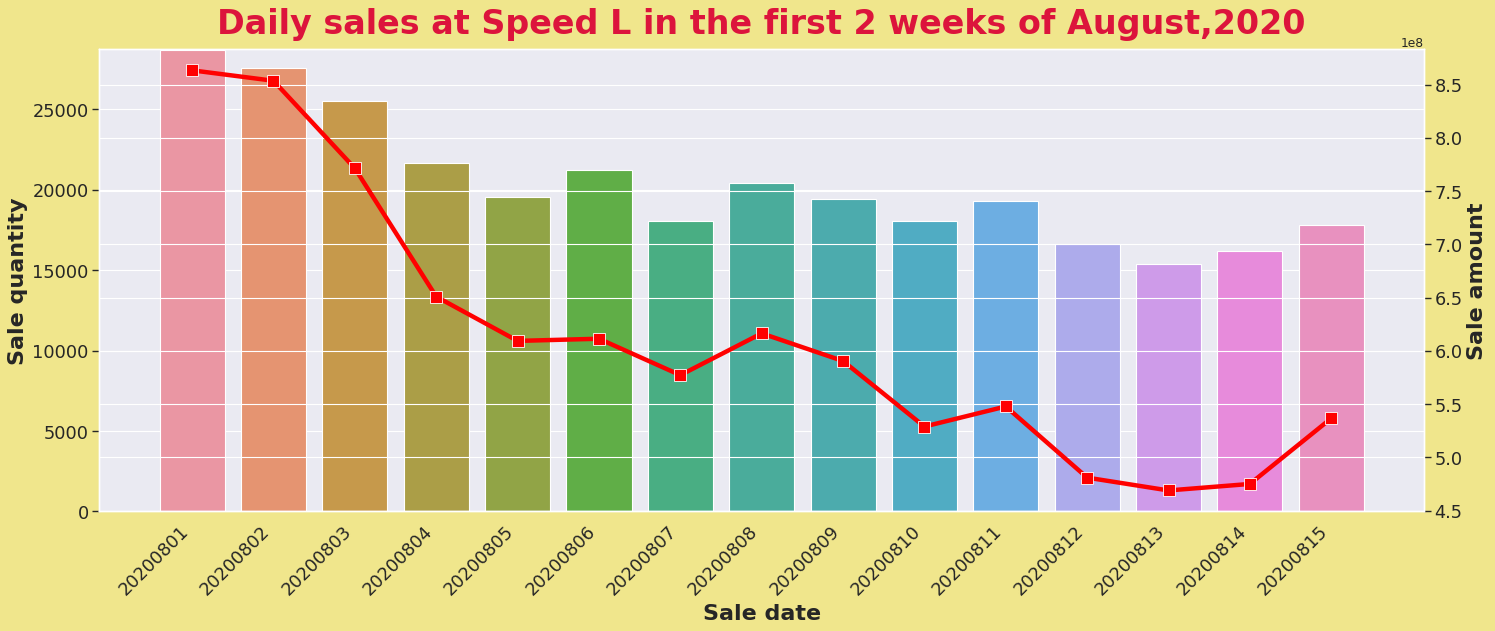

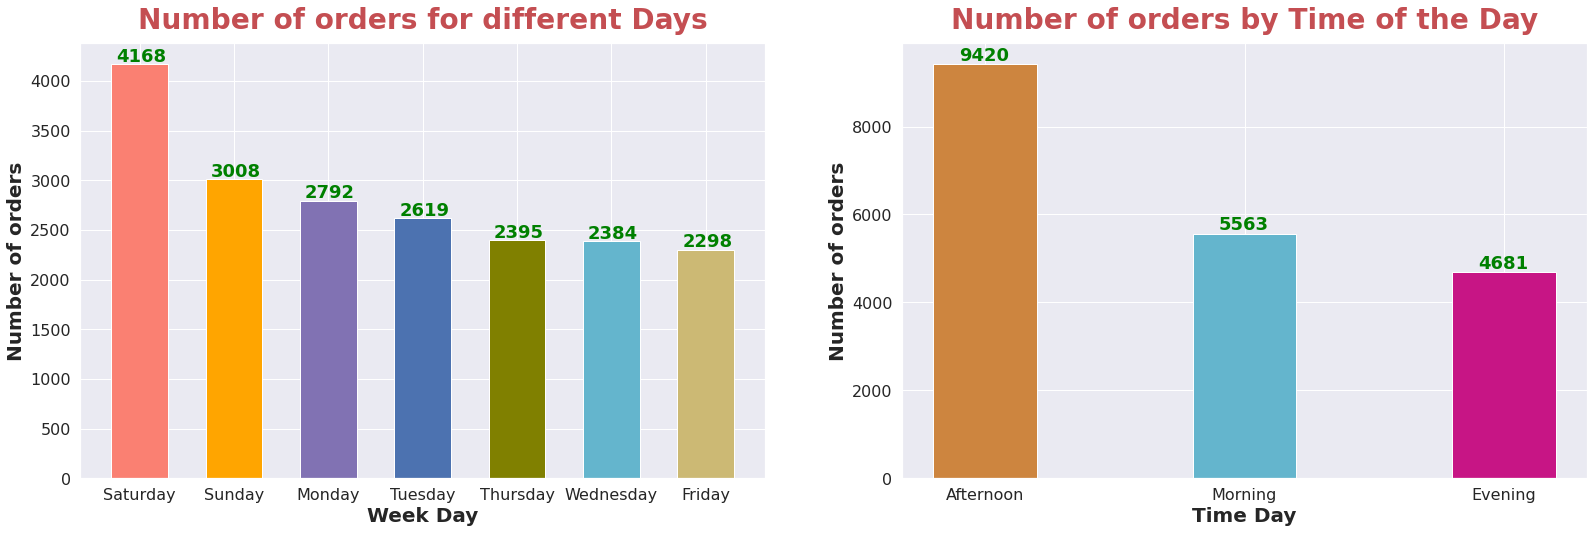

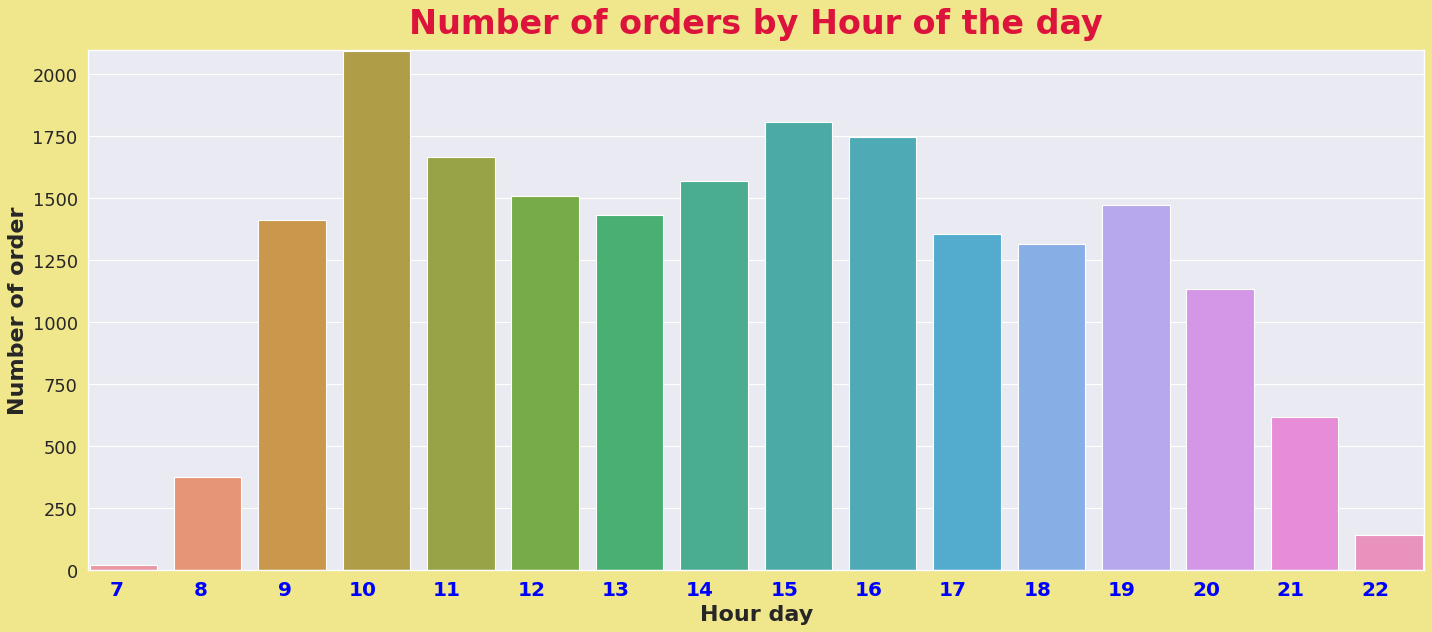

In [19]:
# Plot daily Revenue & Sale qty at Speed L
plt.figure(num=None, figsize=(18,8),dpi=80, facecolor='khaki',edgecolor='k')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light',fontsize='medium')

Sale_qty_by_date=df.groupby('Sale dt')['Sale qty'].sum().reset_index()
barchart=sns.barplot(data=Sale_qty_by_date, x='Sale dt', y='Sale qty', palette=None, ci=None)
barchart.set_title('Daily sales at Speed L in the first 2 weeks of August,2020',color='crimson',fontsize=30,fontweight='bold',y=1.02)
barchart.set_xlabel('Sale date',fontsize=20, fontweight='bold')
barchart.set_ylabel('Sale quantity',fontsize=20,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.margins(0.001)
plt.tight_layout()

Revenue_by_date=df.groupby('Sale dt')['Sale amt.1'].sum().reset_index()
linechart=barchart.twinx()
linechart=sns.lineplot(data=Revenue_by_date, x="Sale dt", y="Sale amt.1", linestyle='-', marker='s', markersize=10, color='red', linewidth=4)
linechart.set_ylabel('Sale amount',fontsize=20,fontweight='bold')
plt.yticks(fontsize=16)

# Plot number of orders by week day and by hour day
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(27,8))
## Chart by week day
plt.subplot(1,2,1)
Order_by_weekday=df.groupby('week day').agg({'Order number':'nunique'}).sort_values('Order number',ascending=False).reset_index()
plt.bar(Order_by_weekday['week day'], Order_by_weekday['Order number'], color=['salmon','orange','m','b','olive','c','y'], width=0.6)
plt.xlabel('Week Day',fontsize=20,fontweight='bold' )
plt.ylabel('Number of orders',fontsize=20,fontweight='bold')
plt.title('Number of orders for different Days',fontsize=28,fontweight='bold', color='r',y=1.02)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16)
for index, value in enumerate(Order_by_weekday['Order number']):
    plt.text(index-0.25,value+30, str(value), fontsize = 18, fontweight ='bold', color ='green')
## Chart by time day
plt.subplot(1,2,2)
Order_by_timeday=df.groupby('time day').agg({'Order number':'nunique'}).sort_values('Order number',ascending=False).reset_index()
plt.bar(Order_by_timeday['time day'], Order_by_timeday['Order number'], color=['peru','c','mediumvioletred'], width=0.4)
plt.xlabel('Time Day',fontsize=20,fontweight='bold' )
plt.ylabel('Number of orders',fontsize=20,fontweight='bold')
plt.title('Number of orders by Time of the Day',fontsize=28,fontweight='bold', color='r',y=1.02)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16)
for index, value in enumerate(Order_by_timeday['Order number']):
    plt.text(index-0.1,value+90, str(value), fontsize = 18, fontweight ='bold', color ='green')

plt.figure(num=None, figsize=(18,8),dpi=80, facecolor='khaki',edgecolor='k')
plt.xticks(rotation=360, horizontalalignment='right', fontweight='light',fontsize='medium')
## Chart by hour day
Order_by_hourday=df.groupby('hour day').agg({'Order number':'nunique'}).reset_index()
ax=sns.barplot(data=Order_by_hourday, x='hour day', y='Order number', palette=None, ci=None)
ax.set_title('Number of orders by Hour of the day',color='crimson',fontsize=30,fontweight='bold',y=1.02)
ax.set_xlabel('Hour day',fontsize=20, fontweight='bold')
ax.set_ylabel('Number of order',fontsize=20, fontweight='bold')
plt.xticks(fontsize=18,color='blue',fontweight='bold')
plt.yticks(fontsize=16)
plt.margins(0.001)
plt.tight_layout()

Above charts show that:

* From August 1st to August 15th, the sale  at Speed L is low in comparison to  previous other date in month. The first days of month is the peak season. Reason can be due to new salary cycle, shopping is on the rise.

* Besides that, we can see order numbers fluctuate periodically: increase at the weekend and decrease gradually on weekday. Saturday & Sunday are the prefered days for Speed L' s customers and they tend to buy more at afternoons.

* Obviously, between morning 10 am till 4pm  generates the most of orders during the day (most of the orders are placed on the online portal from every area) . This implicates the behaviour of the customers, major customer card number active during the office hours. 

>>>*2.4.2  Which store is selling well and good at category? Specifically which product?*

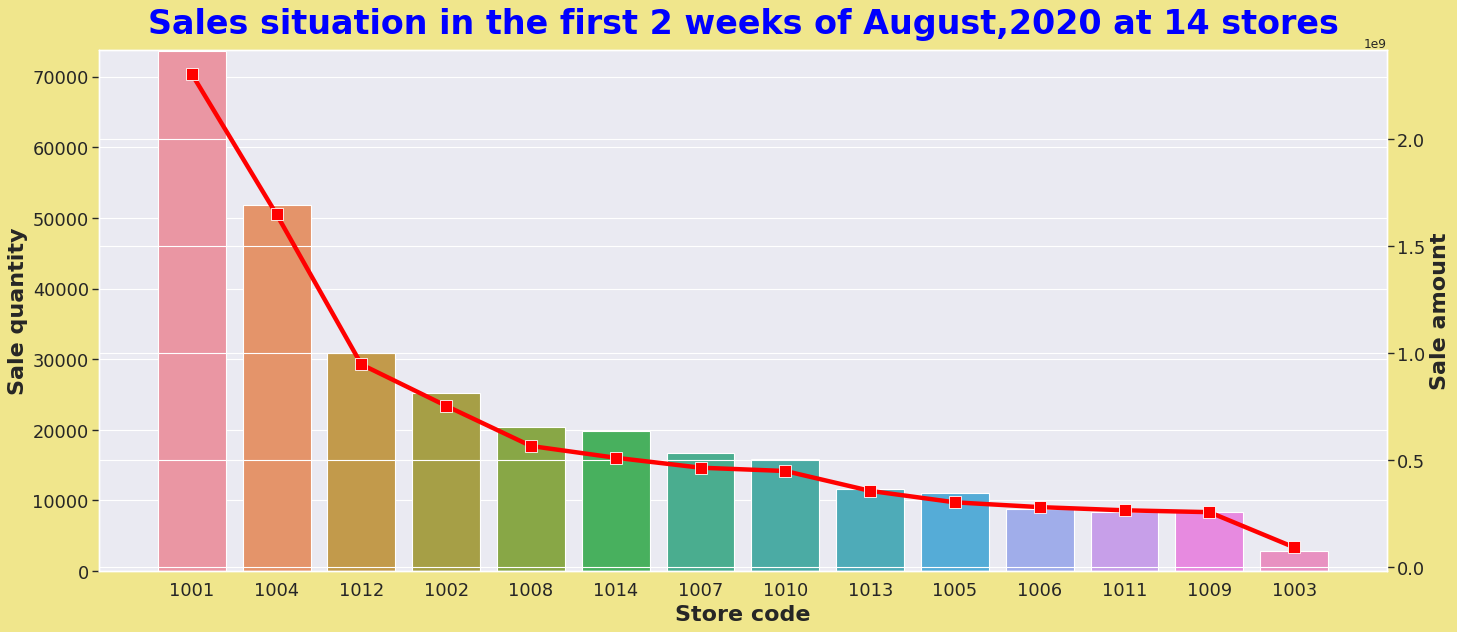



****************************************************************************************************************************************************************




Top 5 most sold 1-Category at store 1001  ... Top 5 most sold 1-Category at store 1012
                                  1-cat nm  ...                      Revenue cumsum in %
0                         BEVERAGE/ALCOHOL  ...                                     17.6
1                             DAIRY FROZEN  ...                                     30.1
2                     NOODLE/OIL/SEASONING  ...                                     34.6
3                               VEGETABLES  ...                                     40.5
4                            CONFECTIONERY  ...                                     48.0

[5 rows x 9 columns]

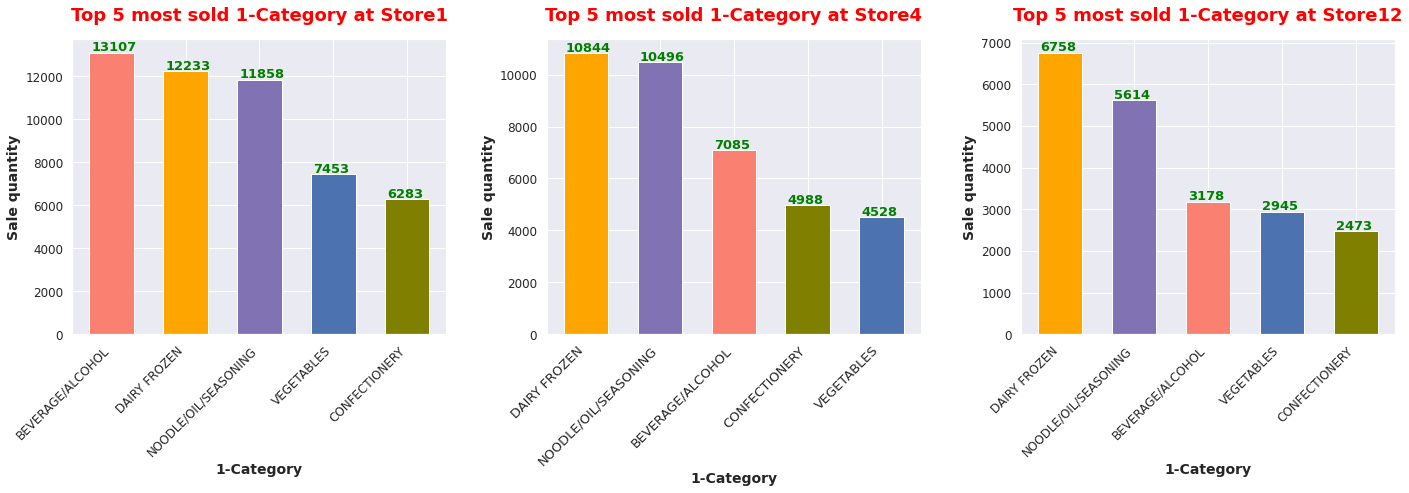

----------------------------------------------------------------------------------------------------------------------------------------------------------------


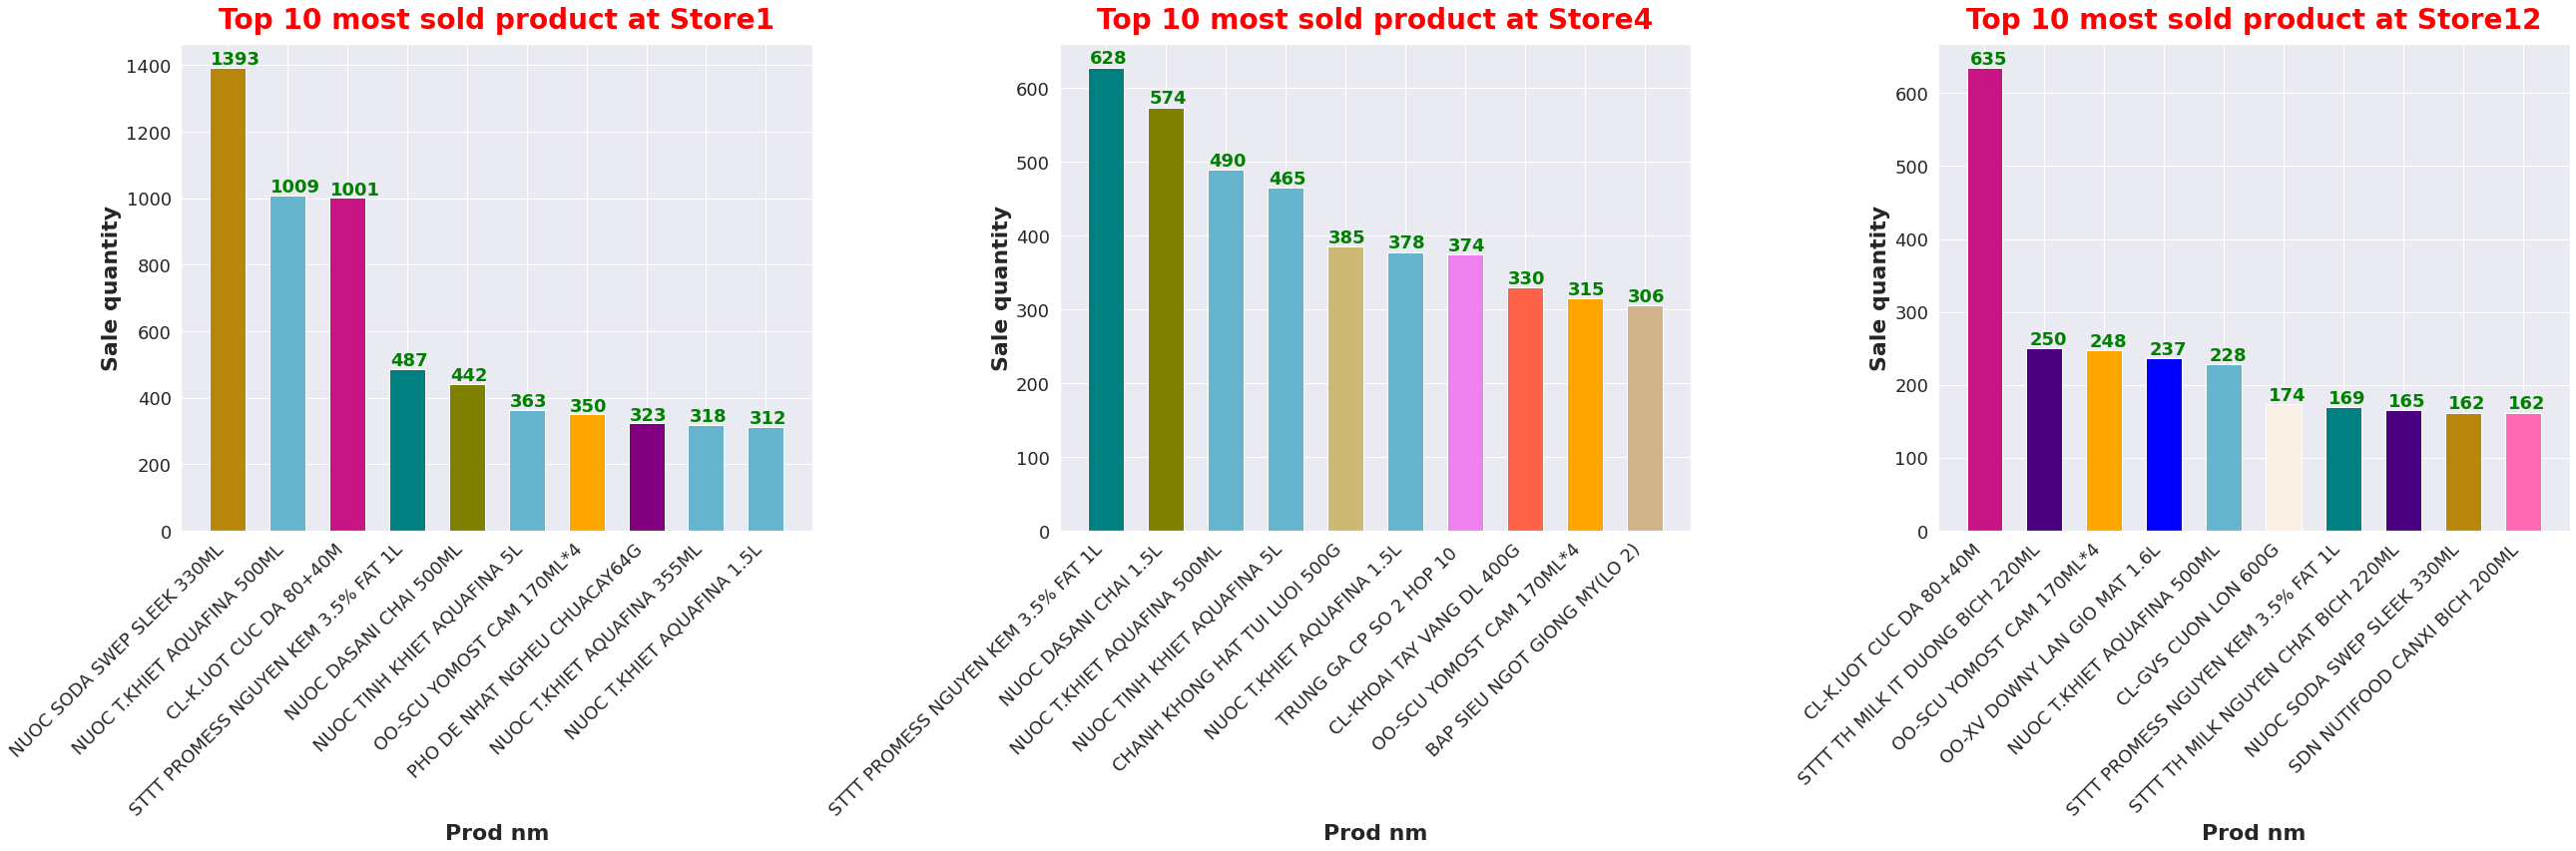

In [20]:
# Plot Revenue & Sale qty in the first 2 week of August at 14 stores
plt.figure(num=None, figsize=(18,8),dpi=80, facecolor='khaki',edgecolor='k')
plt.xticks(rotation=360, horizontalalignment='center', fontweight='light',fontsize='medium')
Sales_situ_by_store=df.groupby('Str cd').agg({'Sale qty':'sum','Sale amt.1':sum}).sort_values('Sale qty',ascending=False).reset_index()
barchart=sns.barplot(data=Sales_situ_by_store, x='Str cd', y='Sale qty', palette=None, ci=None)
barchart.set_title('Sales situation in the first 2 weeks of August,2020 at 14 stores',color='blue',fontsize=30,fontweight='bold',y=1.02)
barchart.set_xlabel('Store code',fontsize=20, fontweight='bold')
barchart.set_ylabel('Sale quantity',fontsize=20,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.margins(0.001)
plt.tight_layout()
linechart=barchart.twinx()
linechart=sns.lineplot(data=Sales_situ_by_store, x="Str cd", y="Sale amt.1", linestyle='-', marker='s', markersize=10, color='red', linewidth=4)
linechart.set_ylabel('Sale amount',fontsize=20,fontweight='bold')
plt.yticks(fontsize=16)
plt.show()
print('\n'*1)
print('*'*160)
print('\n'*1)

# Display top 5 most sold 1-Category for each best store: 1001,1004 & 1012 in the first 2 weeks of August
Store1=df[df['Str cd']=='1001'].groupby('1-cat nm').agg({'Sale qty':'sum','Sale amt.1':'sum'}).sort_values('Sale qty',ascending=False).reset_index()
Store1['Revenue cumsum in %']=round(Store1['Sale amt.1'].cumsum()/df[df['Str cd']=='1001']['Sale amt.1'].sum()*100,1)
Store4=df[df['Str cd']=='1004'].groupby('1-cat nm').agg({'Sale qty':'sum','Sale amt.1':'sum'}).sort_values('Sale qty',ascending=False).reset_index()
Store4['Revenue cumsum in %']=round(Store4['Sale amt.1'].cumsum()/df[df['Str cd']=='1004']['Sale amt.1'].sum()*100,1)
Store12=df[df['Str cd']=='1012'].groupby('1-cat nm').agg({'Sale qty':'sum','Sale amt.1':'sum'}).sort_values('Sale qty',ascending=False).reset_index()
Store12['Revenue cumsum in %']=round(Store12['Sale amt.1'].cumsum()/df[df['Str cd']=='1012']['Sale amt.1'].sum()*100,1)
top5cat_eachbeststore=pd.concat([Store1.iloc[:,[0,1,3]].head(),Store4.iloc[:,[0,1,3]].head(), Store12.iloc[:,[0,1,3]].head()],axis=1,\
            keys=['Top 5 most sold 1-Category at store 1001','Top 5 most sold 1-Category at store 1004','Top 5 most sold 1-Category at store 1012'])
display(top5cat_eachbeststore)
# Plot most sold 1-Category for each best stores: 1001,1004 & 1012 in the first 2 weeks of August
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
## Chart for Store1
plt.subplot(1,3,1)
Store1=df[df['Str cd']=='1001'].groupby('1-cat nm').agg({'Sale qty':'sum','Sale amt.1':'sum'}).sort_values('Sale qty',ascending=False).reset_index()
Store1=Store1[:5]
plt.bar(Store1['1-cat nm'],Store1['Sale qty'] , color=['salmon','orange','m','b','olive'], width=0.6)
plt.xlabel('1-Category',fontsize=14,fontweight='bold' )
plt.ylabel('Sale quantity',fontsize=14,fontweight='bold')
plt.title('Top 5 most sold 1-Category at Store1',fontsize=18,fontweight='bold', color='red',y=1.04)
plt.xticks(rotation=45,horizontalalignment='right',fontsize=12)
plt.yticks(fontsize=12)
for index, value in enumerate(Store1['Sale qty']):
    plt.text(index-0.27,value+80, str(value), fontsize = 13, fontweight ='bold', color ='green')
## Chart for Store4
plt.subplot(1,3,2)
Store4=df[df['Str cd']=='1004'].groupby('1-cat nm').agg({'Sale qty':'sum','Sale amt.1':'sum'}).sort_values('Sale qty',ascending=False).reset_index()
Store4=Store4[:5]
plt.bar(Store4['1-cat nm'],Store4['Sale qty'] , color=['orange','m','salmon','olive','b'], width=0.6)
plt.xlabel('1-Category',fontsize=14,fontweight='bold' )
plt.ylabel('Sale quantity',fontsize=14,fontweight='bold')
plt.title('Top 5 most sold 1-Category at Store4',fontsize=18,fontweight='bold', color='red',y=1.04)
plt.xticks(rotation=45,horizontalalignment='right',fontsize=13)
plt.yticks(fontsize=12)
for index, value in enumerate(Store4['Sale qty']):
    plt.text(index-0.27,value+50, str(value), fontsize = 13, fontweight ='bold', color ='green')
## Chart for Store12
plt.subplot(1,3,3)
Store12=df[df['Str cd']=='1012'].groupby('1-cat nm').agg({'Sale qty':'sum','Sale amt.1':'sum'}).sort_values('Sale qty',ascending=False).reset_index()
Store12=Store12[:5]
plt.bar(Store12['1-cat nm'],Store12['Sale qty'] , color=['orange','m','salmon','b','olive'], width=0.6)
plt.xlabel('1-Category',fontsize=14,fontweight='bold' )
plt.ylabel('Sale quantity',fontsize=14,fontweight='bold')
plt.title('Top 5 most sold 1-Category at Store12',fontsize=18,fontweight='bold', color='red',y=1.04)
plt.xticks(rotation=45,horizontalalignment='right',fontsize=12)
plt.yticks(fontsize=12)
for index, value in enumerate(Store12['Sale qty']):
    plt.text(index-0.27,value+50, str(value), fontsize = 13, fontweight ='bold', color ='green')
plt.tight_layout()
plt.show()
print('-'*160)
# Plot most sold product for each best stores: 1001,1004 & 1012 in the first 2 weeks of August
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(36,12))
## Chart for Store1
plt.subplot(1,3,1)
Store1=df[df['Str cd']=='1001'].groupby('Prod nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()[:10]
plt.bar(Store1['Prod nm'],Store1['Sale qty'] , color=['darkgoldenrod','c','mediumvioletred','teal','olive','c','orange','purple','c','c'], width=0.6)
plt.xlabel('Prod nm',fontsize=22,fontweight='bold' )
plt.ylabel('Sale quantity',fontsize=22,fontweight='bold')
plt.title('Top 10 most sold product at Store1',fontsize=28,fontweight='bold', color='red',y=1.02)
plt.xticks(rotation=45,horizontalalignment='right',fontsize=18)
plt.yticks(fontsize=18)
for index, value in enumerate(Store1['Sale qty']):
    plt.text(index-0.28,value+10, str(value), fontsize = 18, fontweight ='bold', color ='green')
## Chart for Store4
plt.subplot(1,3,2)
Store4=df[df['Str cd']=='1004'].groupby('Prod nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()[:10]
plt.bar(Store4['Prod nm'],Store4['Sale qty'] , color=['teal','olive','c','c','y','c','violet','tomato','orange','tan'], width=0.6)
plt.xlabel('Prod nm',fontsize=22,fontweight='bold' )
plt.ylabel('Sale quantity',fontsize=22,fontweight='bold')
plt.title('Top 10 most sold product at Store4',fontsize=28,fontweight='bold', color='red',y=1.02)
plt.xticks(rotation=45,horizontalalignment='right',fontsize=18)
plt.yticks(fontsize=18)
for index, value in enumerate(Store4['Sale qty']):
    plt.text(index-0.28,value+5, str(value), fontsize = 18, fontweight ='bold', color ='green')
## Chart for Store12
plt.subplot(1,3,3)
Store12=df[df['Str cd']=='1012'].groupby('Prod nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()[:10]
plt.bar(Store12['Prod nm'],Store12['Sale qty'] , color=['mediumvioletred','indigo','orange','blue','c','linen','teal','indigo','darkgoldenrod','hotpink'], width=0.6)
plt.xlabel('Prod nm',fontsize=22,fontweight='bold' )
plt.ylabel('Sale quantity',fontsize=22,fontweight='bold')
plt.title('Top 10 most sold product at Store12',fontsize=28,fontweight='bold', color='red',y=1.02)
plt.xticks(rotation=45,horizontalalignment='right',fontsize=18)
plt.yticks(fontsize=18)
for index, value in enumerate(Store12['Sale qty']):
    plt.text(index-0.25,value+5, str(value), fontsize = 18, fontweight ='bold', color ='green')
plt.tight_layout()

The first plot gives the clear picture that: 1001, 1004  and 1012 are the best stores in sales of the first 2 weeks of August.

* They have some of best-selling product categories include: Dairy frozen, Noodle/ Oil/ Seasoning, Beverage/ Alcohol, Confectionery, Vegetables. These ones account for approximate 50 percentage (**≈50%**) of sales in total at each store.

* Specifically in products such as: Aquafina-pure water with various in volume, Promess-full cream pasteurized fresh milk, Yomost milk with orange, Danisa water, Cuc Da wet paper tissue, Swep Sleek-soda water

>>>*2.4.3 Which major category (cate-1) is best selling? Detailed analysis for cate-4 and best-selling products in the past? Give comments on consumer trends (divided into 3 regions: North, Middle, South)*

In [21]:
# Determine area for different stores: North, Middle and South
## Create a function that operates on the row like so:
def f(row):
  if   row['Str cd'] == '1007'or row['Str cd'] =='1014' or row['Str cd'] =='1008':
        val="North"
  elif row['Str cd'] == '1004' or row['Str cd'] =='1006' or row['Str cd'] =='1013':
        val="Middle"  
  else:
        val="South"
  return val
## Then apply to "df" to add new column "Area" by passing in the axis=1 option:
df['Area']=df.apply(f,axis=1)



Most best selling category(Cate-1)in the first 2 weeks of August,2020 is DAIRY FROZEN


Below are charts is to display top 10 best selling category(Cate-4) and product in the past time
----------------------------------------------------------------------------------------------------------------------------------------------------------------


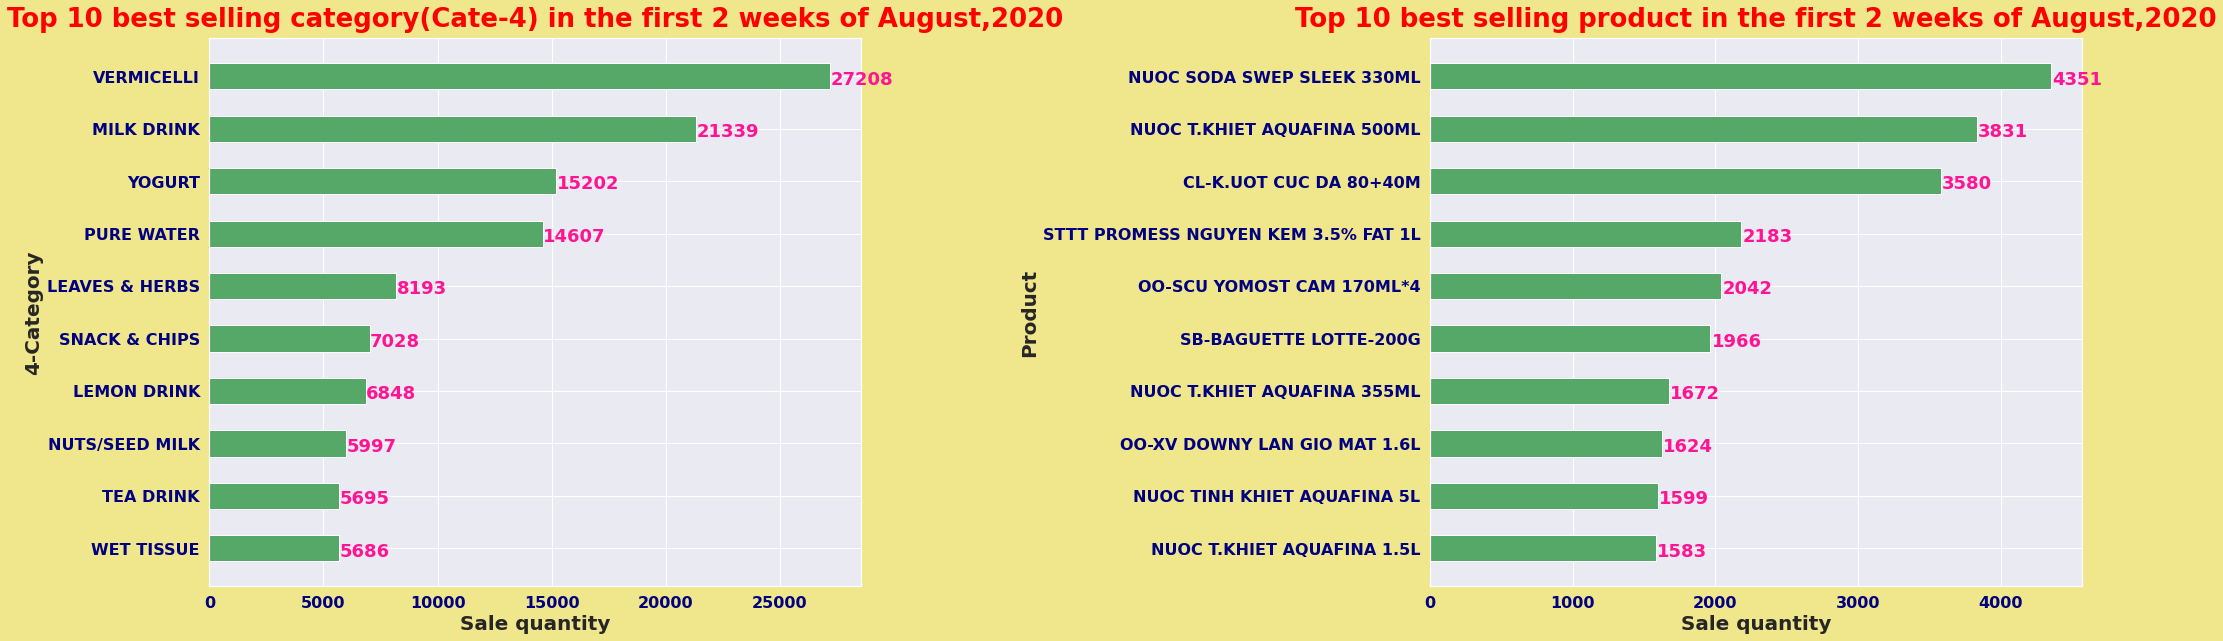

In [22]:
# Display best selling category (cate-1)
topcat1=df.groupby('1-cat nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()
print('\n'*1)
print('Most best selling category(Cate-1)in the first 2 weeks of August,2020 is',topcat1.iloc[0,0])
print('\n'*1)
print('Below are charts is to display top 10 best selling category(Cate-4) and product in the past time')
print('-'*160)
# Plot top 10 of 4-Category & product that is best selling in the first 2 weeks of August
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,9),facecolor='khaki',edgecolor='k')
## Chart for 4-Category
plt.subplot(1,2,1)
topcat4=df.groupby('4-Cat Nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()[:10]
topcat4=topcat4.sort_values('Sale qty')
x=topcat4['4-Cat Nm']
y=topcat4['Sale qty']
plt.barh(x, y, color='g', height=0.5)
plt.title('Top 10 best selling category(Cate-4) in the first 2 weeks of August,2020',color='red',fontsize=26,fontweight='bold',y=1.01)
plt.xlabel('Sale quantity',fontsize=20, fontweight='bold')
plt.ylabel('4-Category',fontsize=20,fontweight='bold')
plt.xticks(fontsize=16,color='navy',fontweight='bold')
plt.yticks(fontsize=16,color='navy',fontweight='bold')
for index, value in enumerate(y):
    plt.text(value+8, index-0.15, str(value),fontsize = 18, fontweight ='bold', 
             color ='deeppink')
## Chart for Product
plt.subplot(1,2,2)
topprod=df.groupby('Prod nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()[:10]
topprod=topprod.sort_values('Sale qty')
x=topprod['Prod nm']
y=topprod['Sale qty']
plt.barh(x, y, color='g', height=0.5)
plt.title('Top 10 best selling product in the first 2 weeks of August,2020',color='red',fontsize=26,fontweight='bold',y=1.01)
plt.xlabel('Sale quantity',fontsize=20, fontweight='bold')
plt.ylabel('Product',fontsize=20,fontweight='bold')
plt.xticks(fontsize=16,color='navy',fontweight='bold')
plt.yticks(fontsize=16,color='navy',fontweight='bold')
for index, value in enumerate(y):
    plt.text(value+8, index-0.15, str(value),fontsize = 18, fontweight ='bold', 
             color ='deeppink')
plt.tight_layout()
plt.show()

The **most best-selling** category(**Cate-1**) in the first 2 weeks of August,2020 is **Dairy frozen**

Regarding best-selling category (Cate-4) concentrate mainly in FMCG products such as: Vermicelli, Milk ( Milk drink, Yogust, Nuts/Seed milk), Beverage (Pure quater, Lemon drink, Tea drink), Snack, Wet tissue, etc . Specifically as follows: pure water of Aquafina with various type of volume, Yomost milk with orange, Cuc Da wet tissue, full cream pasteurized fresh milk of Promess, soda water of Swep Sleek,etc. "Top 10 categories(cate-4) and products" charts in above is for your reference

 => Should deald with vendors of these products to get the best price or any better services, etc

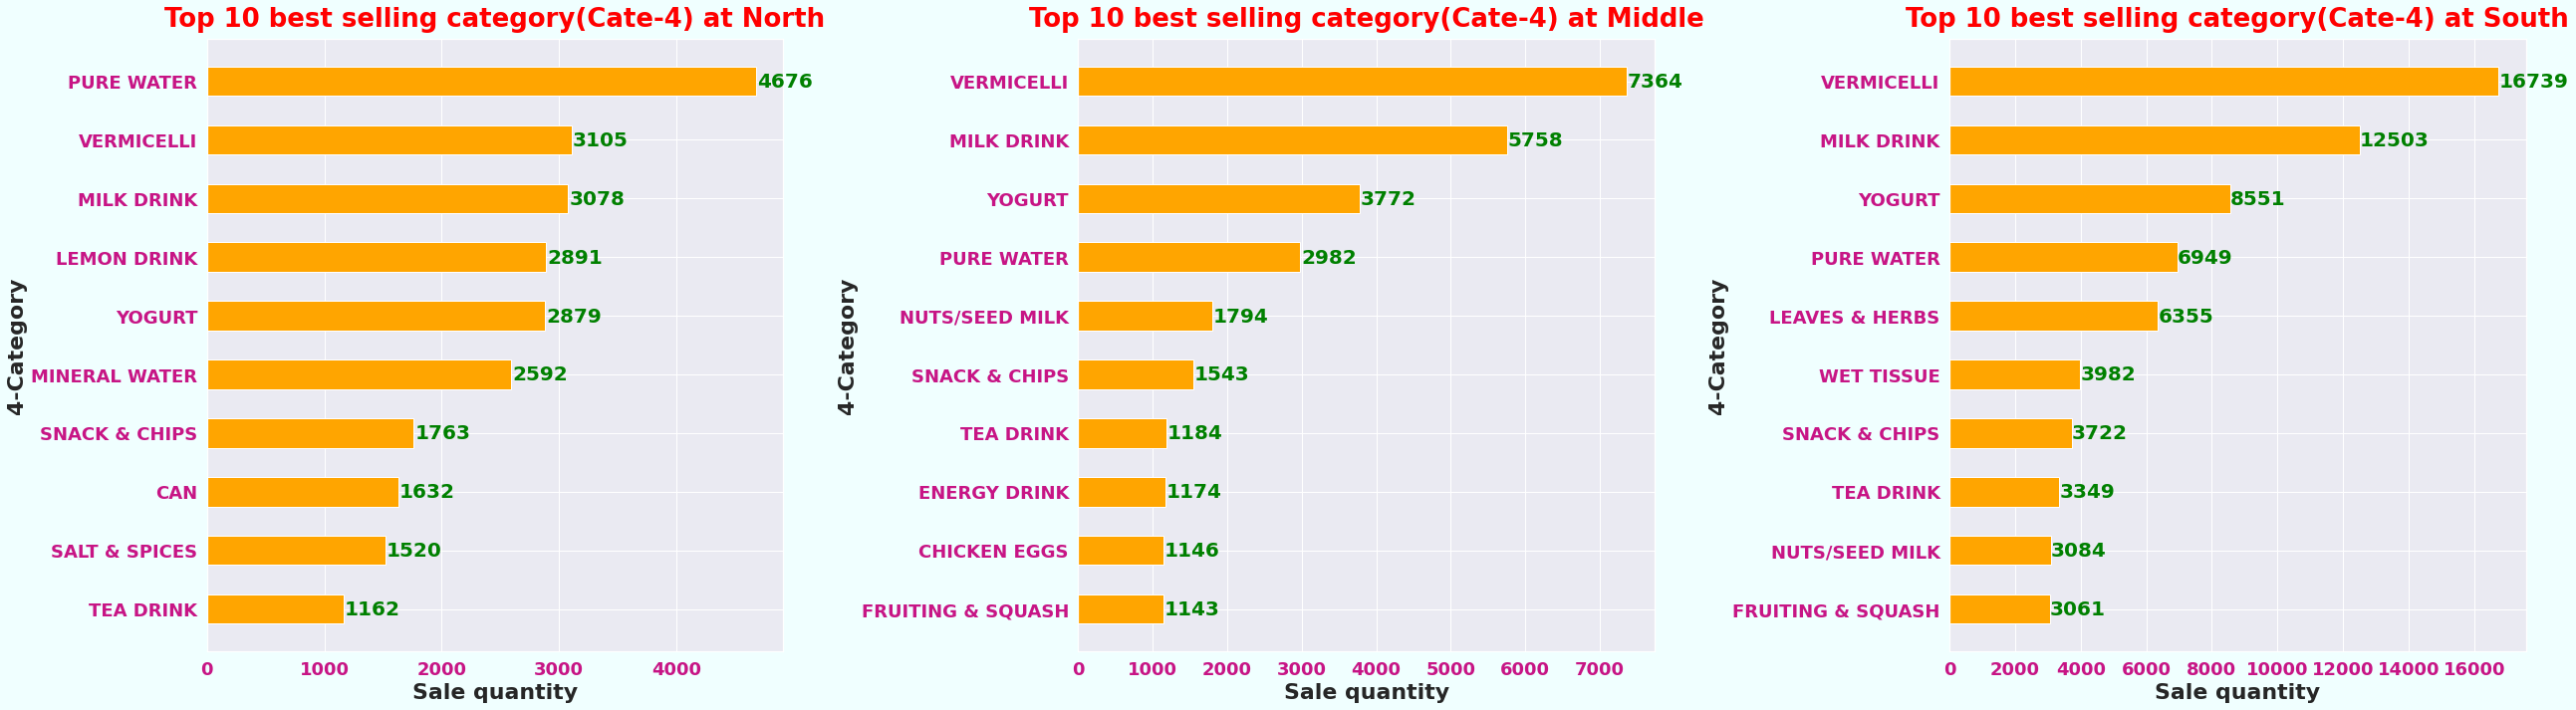

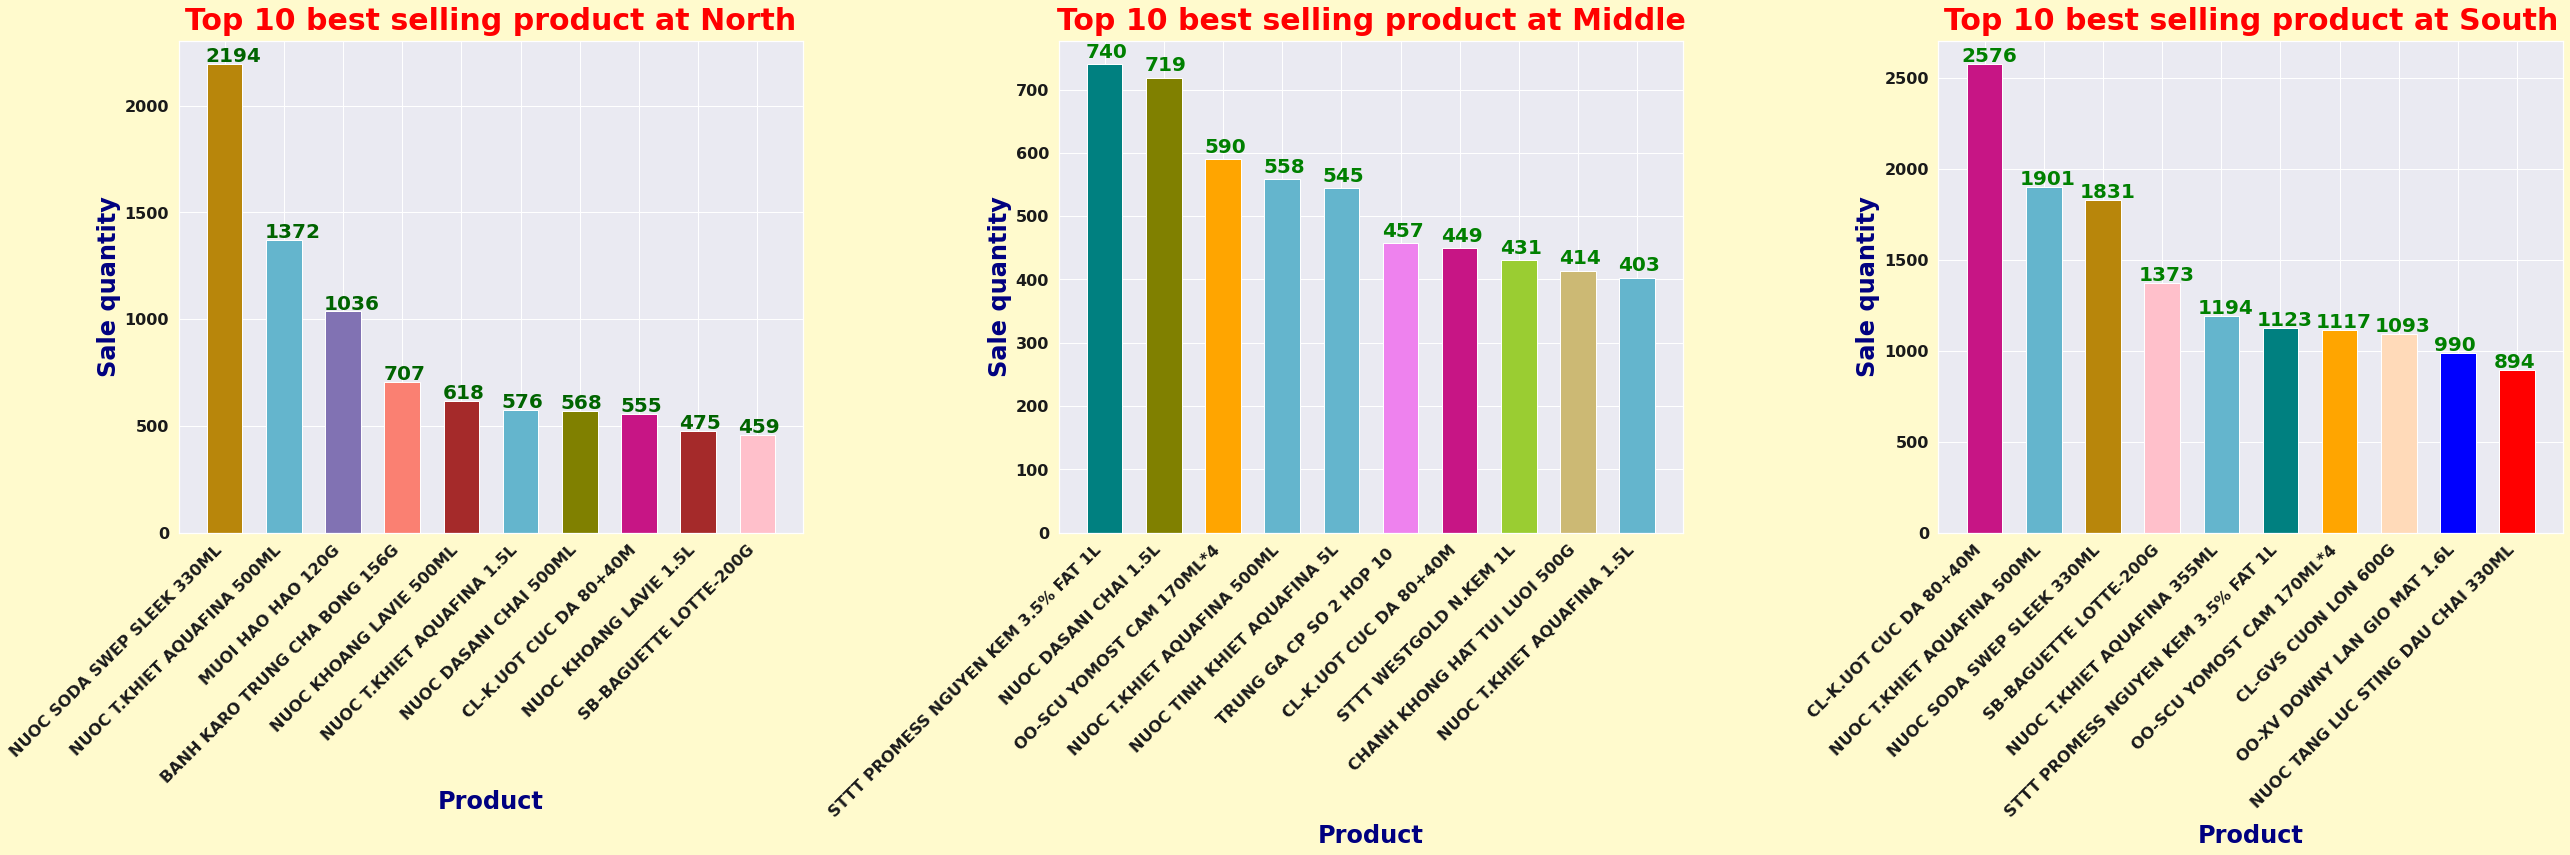

In [23]:
# Plot top 10 best selling Category(Cate-4) at 3 area: North, Middle and South
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(36,10),facecolor='azure',edgecolor='k')
## Chart for North area
plt.subplot(1,3,1)
topcat4_North=df[df['Area']=='North'].groupby('4-Cat Nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()[:10]
topcat4_North=topcat4_North.sort_values('Sale qty')
x=topcat4_North['4-Cat Nm']
y=topcat4_North['Sale qty']
plt.barh(x, y, color='orange', height=0.5)
plt.title('Top 10 best selling category(Cate-4) at North',color='red',fontsize=26,fontweight='bold',y=1.01)
plt.xlabel('Sale quantity',fontsize=22, fontweight='bold')
plt.ylabel('4-Category',fontsize=22,fontweight='bold')
plt.xticks(fontsize=18,color='mediumvioletred',fontweight='bold')
plt.yticks(fontsize=18,color='mediumvioletred',fontweight='bold')
for index, value in enumerate(y):
    plt.text(value+8, index-0.1, str(value),fontsize = 20, fontweight ='bold', 
             color ='green')
## Chart for Middle area
plt.subplot(1,3,2)
topcat4_Middle=df[df['Area']=='Middle'].groupby('4-Cat Nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()[:10]
topcat4_Middle=topcat4_Middle.sort_values('Sale qty')
x=topcat4_Middle['4-Cat Nm']
y=topcat4_Middle['Sale qty']
plt.barh(x, y, color='orange', height=0.5)
plt.title('Top 10 best selling category(Cate-4) at Middle',color='red',fontsize=26,fontweight='bold',y=1.01)
plt.xlabel('Sale quantity',fontsize=22, fontweight='bold')
plt.ylabel('4-Category',fontsize=22,fontweight='bold')
plt.xticks(fontsize=18,color='mediumvioletred',fontweight='bold')
plt.yticks(fontsize=18,color='mediumvioletred',fontweight='bold')
for index, value in enumerate(y):
    plt.text(value+8, index-0.1, str(value),fontsize = 20, fontweight ='bold', 
             color ='green')
## Chart for South area
plt.subplot(1,3,3)
topcat4_South=df[df['Area']=='South'].groupby('4-Cat Nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()[:10]
topcat4_South=topcat4_South.sort_values('Sale qty')
x=topcat4_South['4-Cat Nm']
y=topcat4_South['Sale qty']
plt.barh(x, y, color='orange', height=0.5)
plt.title('Top 10 best selling category(Cate-4) at South',color='red',fontsize=26,fontweight='bold',y=1.01)
plt.xlabel('Sale quantity',fontsize=22, fontweight='bold')
plt.ylabel('4-Category',fontsize=22,fontweight='bold')
plt.xticks(fontsize=18,color='mediumvioletred',fontweight='bold')
plt.yticks(fontsize=18,color='mediumvioletred',fontweight='bold')
for index, value in enumerate(y):
    plt.text(value+8, index-0.1, str(value),fontsize = 20, fontweight ='bold', 
             color ='green')
plt.tight_layout()

# Plot top 10 best selling Product at 3 area: North, Middle and South
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(36,12),facecolor='lemonchiffon',edgecolor='k')
## Chart for North area
plt.subplot(1,3,1)
topprod_North=df[df['Area']=='North'].groupby('Prod nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()[:10]
plt.bar(topprod_North['Prod nm'], topprod_North['Sale qty'], color=['darkgoldenrod','c','m','salmon','brown','c','olive','mediumvioletred','brown','pink'], width=0.6)
plt.title('Top 10 best selling product at North',color='red',fontsize=30,fontweight='bold',y=1.01)
plt.xlabel('Product',fontsize=24, fontweight='bold',color='navy')
plt.ylabel('Sale quantity',fontsize=24,fontweight='bold',color='navy')
plt.xticks(rotation=45,horizontalalignment='right',fontsize=16,color='k',fontweight ='bold')
plt.yticks(fontsize=16,color='k',fontweight ='bold')
for index, value in enumerate(topprod_North['Sale qty']):
    plt.text(index-0.32,value+10, str(value), fontsize = 20, fontweight ='bold', color ='darkgreen')
## Chart for South area
plt.subplot(1,3,2)
topprod_Middle=df[df['Area']=='Middle'].groupby('Prod nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()[:10]
plt.bar(topprod_Middle['Prod nm'], topprod_Middle['Sale qty'], color=['teal','olive','orange','c','c','violet','mediumvioletred','yellowgreen','y','c'], width=0.6)
plt.title('Top 10 best selling product at Middle',color='red',fontsize=30,fontweight='bold',y=1.01)
plt.xlabel('Product',fontsize=24, fontweight='bold',color='navy')
plt.ylabel('Sale quantity',fontsize=24,fontweight='bold',color='navy')
plt.xticks(rotation=45,horizontalalignment='right',fontsize=16,color='k',fontweight ='bold')
plt.yticks(fontsize=16,color='k',fontweight ='bold')
for index, value in enumerate(topprod_Middle['Sale qty']):
    plt.text(index-0.32,value+10, str(value), fontsize = 20, fontweight ='bold', color ='green')
## Chart for South area
plt.subplot(1,3,3)
topprod_South=df[df['Area']=='South'].groupby('Prod nm').agg({'Sale qty':'sum'}).sort_values('Sale qty',ascending=False).reset_index()[:10]
plt.bar(topprod_South['Prod nm'], topprod_South['Sale qty'], color=['mediumvioletred','c','darkgoldenrod','pink','c','teal','orange','peachpuff','blue','red'], width=0.6)
plt.title('Top 10 best selling product at South',color='red',fontsize=30,fontweight='bold',y=1.01)
plt.xlabel('Product',fontsize=24, fontweight='bold',color='navy')
plt.ylabel('Sale quantity',fontsize=24,fontweight='bold',color='navy')
plt.xticks(rotation=45,horizontalalignment='right',fontsize=16,color='k',fontweight ='bold')
plt.yticks(fontsize=16,color='k',fontweight ='bold')
for index, value in enumerate(topprod_South['Sale qty']):
    plt.text(index-0.4,value+12, str(value), fontsize = 20, fontweight ='bold', color ='green')
plt.tight_layout()
plt.show()

Middle and South regions  have similar consumer preferences, focusing on 4 major categories(cate-4) in order as: Vermicelli, Milk drink, Yogust and Pure water whereas Pure water is the most best-selling product at North, then is Vermicelli, Milk drink and Lemon drink is the last one. 

Anyhow, pure water and wet tissue are popular products among regions while:

* Soda water of Swep Sleek are common at North and South areas only

* Milk drinking products such as: Yomost with orange, full cream pasteurized fresh milk of Promess are popular at South and Middle regions 

* Likewise, Dasani water is well-liked at Middle and North regions

,Area,Str cd,Cust card no,Order number,Sale qty,Sale amt.1
0,Middle,3,3141,5318,72287,2281725446
1,North,3,1958,3284,56900,1538413854
2,South,8,6571,11062,176296,5362939540


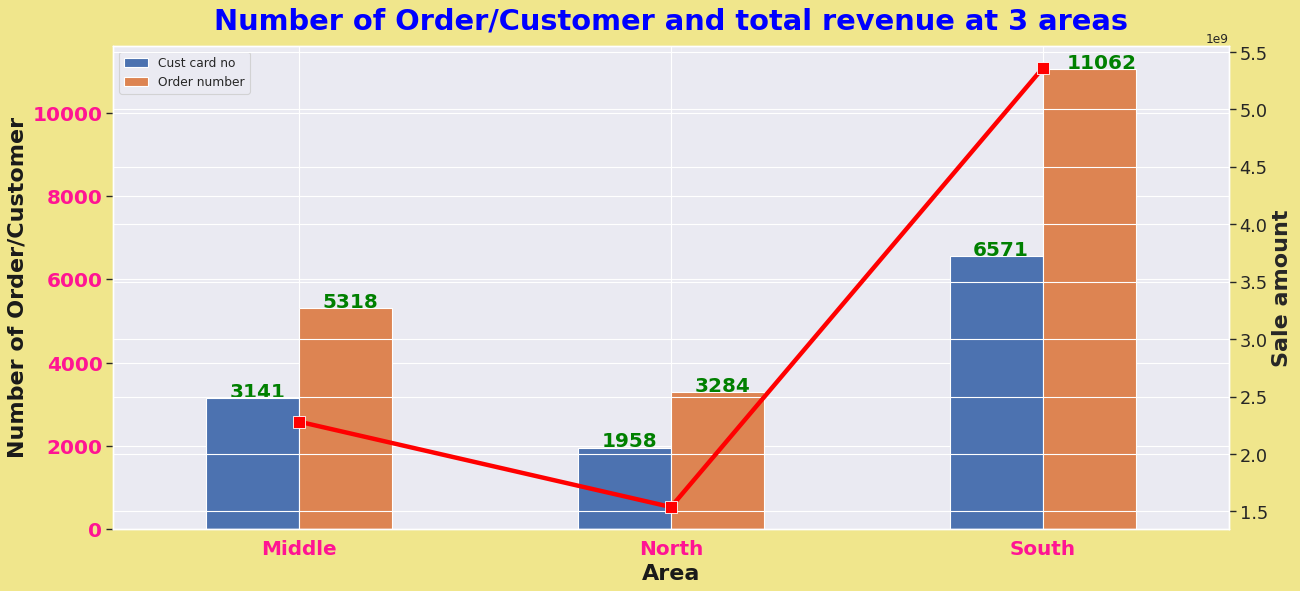

----------------------------------------------------------------------------------------------------------------------------------------------------------------


,North,Middle,South
Delivery distance,,,
0,0.0,0.1,0.0
1,24.7,13.6,25.2
2,41.9,25.7,43.5
3,54.3,34.4,52.2
4,62.8,49.6,68.7
5,79.0,63.8,74.0
6,83.8,72.8,81.6
7,90.2,86.1,86.2
8,95.2,88.8,93.2


In [24]:
# Evaluate sales at 3 areas: North, Middle and South in the first 2 weeks of August
sales_at3area=df.groupby('Area').agg({'Str cd':'nunique','Cust card no':'nunique','Order number':'nunique','Sale qty':'sum','Sale amt.1':'sum'}).reset_index()
display(sales_at3area)
fig, ax = plt.subplots(figsize=(18,8),dpi=80, facecolor='khaki',edgecolor='k',num=None)
sales_at3area.plot.bar(x = 'Area', y = ['Cust card no', 'Order number'], ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/4., p.get_height()+15),color='green',fontweight='bold',fontsize=18)
ax.set_title('Number of Order/Customer and total revenue at 3 areas', color='blue',fontweight='bold',fontsize=26,y=1.02)
ax.set_xlabel('Area',color='k',fontweight='bold',fontsize=20)
ax.set_ylabel('Number of Order/Customer',color='k',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,horizontalalignment='center',fontsize=18,color='deeppink',fontweight='bold')
plt.yticks(fontsize=18,color='deeppink',fontweight='bold')

linechart=ax.twinx()
linechart=sns.lineplot(data=sales_at3area, x="Area", y="Sale amt.1", linestyle='-', marker='s', markersize=10, color='red', linewidth=4)
linechart.set_ylabel('Sale amount',fontsize=20,fontweight='bold')
plt.yticks(fontsize=16)
plt.show()
print('-'*160)
# Define the living area (network radius) of customers are ordering at the Speed L
b=df[df['Area']=='North'].groupby('Delivery distance')['Order number'].nunique().reset_index()
c=df[df['Area']=='Middle'].groupby('Delivery distance')['Order number'].nunique().reset_index()
d=df[df['Area']=='South'].groupby('Delivery distance')['Order number'].nunique().reset_index()
b['No Order cumsum in %']=round(b['Order number'].cumsum()/b['Order number'].sum()*100,1)
c['No Order cumsum in %']=round(c['Order number'].cumsum()/c['Order number'].sum()*100,1)
d['No Order cumsum in %']=round(d['Order number'].cumsum()/d['Order number'].sum()*100,1)
b=b.set_index('Delivery distance')
c=c.set_index('Delivery distance')
d=d.set_index('Delivery distance')
e=pd.concat([b.iloc[:,1],c.iloc[:,1],d.iloc[:,1]],axis=1,keys=['North','Middle','South'])
e

Based on table and chart in above, we see that:

The number of orders/customers and sales in the Middle is over 2  times lower than South. This is proportional to the number of stores in the two regions -> may be acceptable

However, the number of orders/customers and sales in the Middle is approximate **1.5 times** higher than North despite having the same number of stores (3 stores) -> **need to investigate more**

Looking at  information from the last table, it is clear that approximately  80 percentage (**≈80%**) number of order at **North** sales is concentrated within a **"5-kilometer"** radius. Whereas, **80%** number of orders at **Middle** region are located in **"less than 7-kilometer"** radius  -> maybe, this is a reason lead to lower sales at North => should consider to improve by expanding network radius of customers through marketing campaign, making the survey, etc

>>>*2.4.4  The average of order value and the average value of the product categories ? What are the differences between various product categories?*

The average of order value is 467000.0 VND
Statistic data for the average value of categories(cate-1) per one order


count        27.0
mean     119940.0
std       58787.0
min       41036.0
25%       87506.0
50%      115736.0
75%      139822.0
max      365562.0
Name: Avg_sale/order, dtype: float64

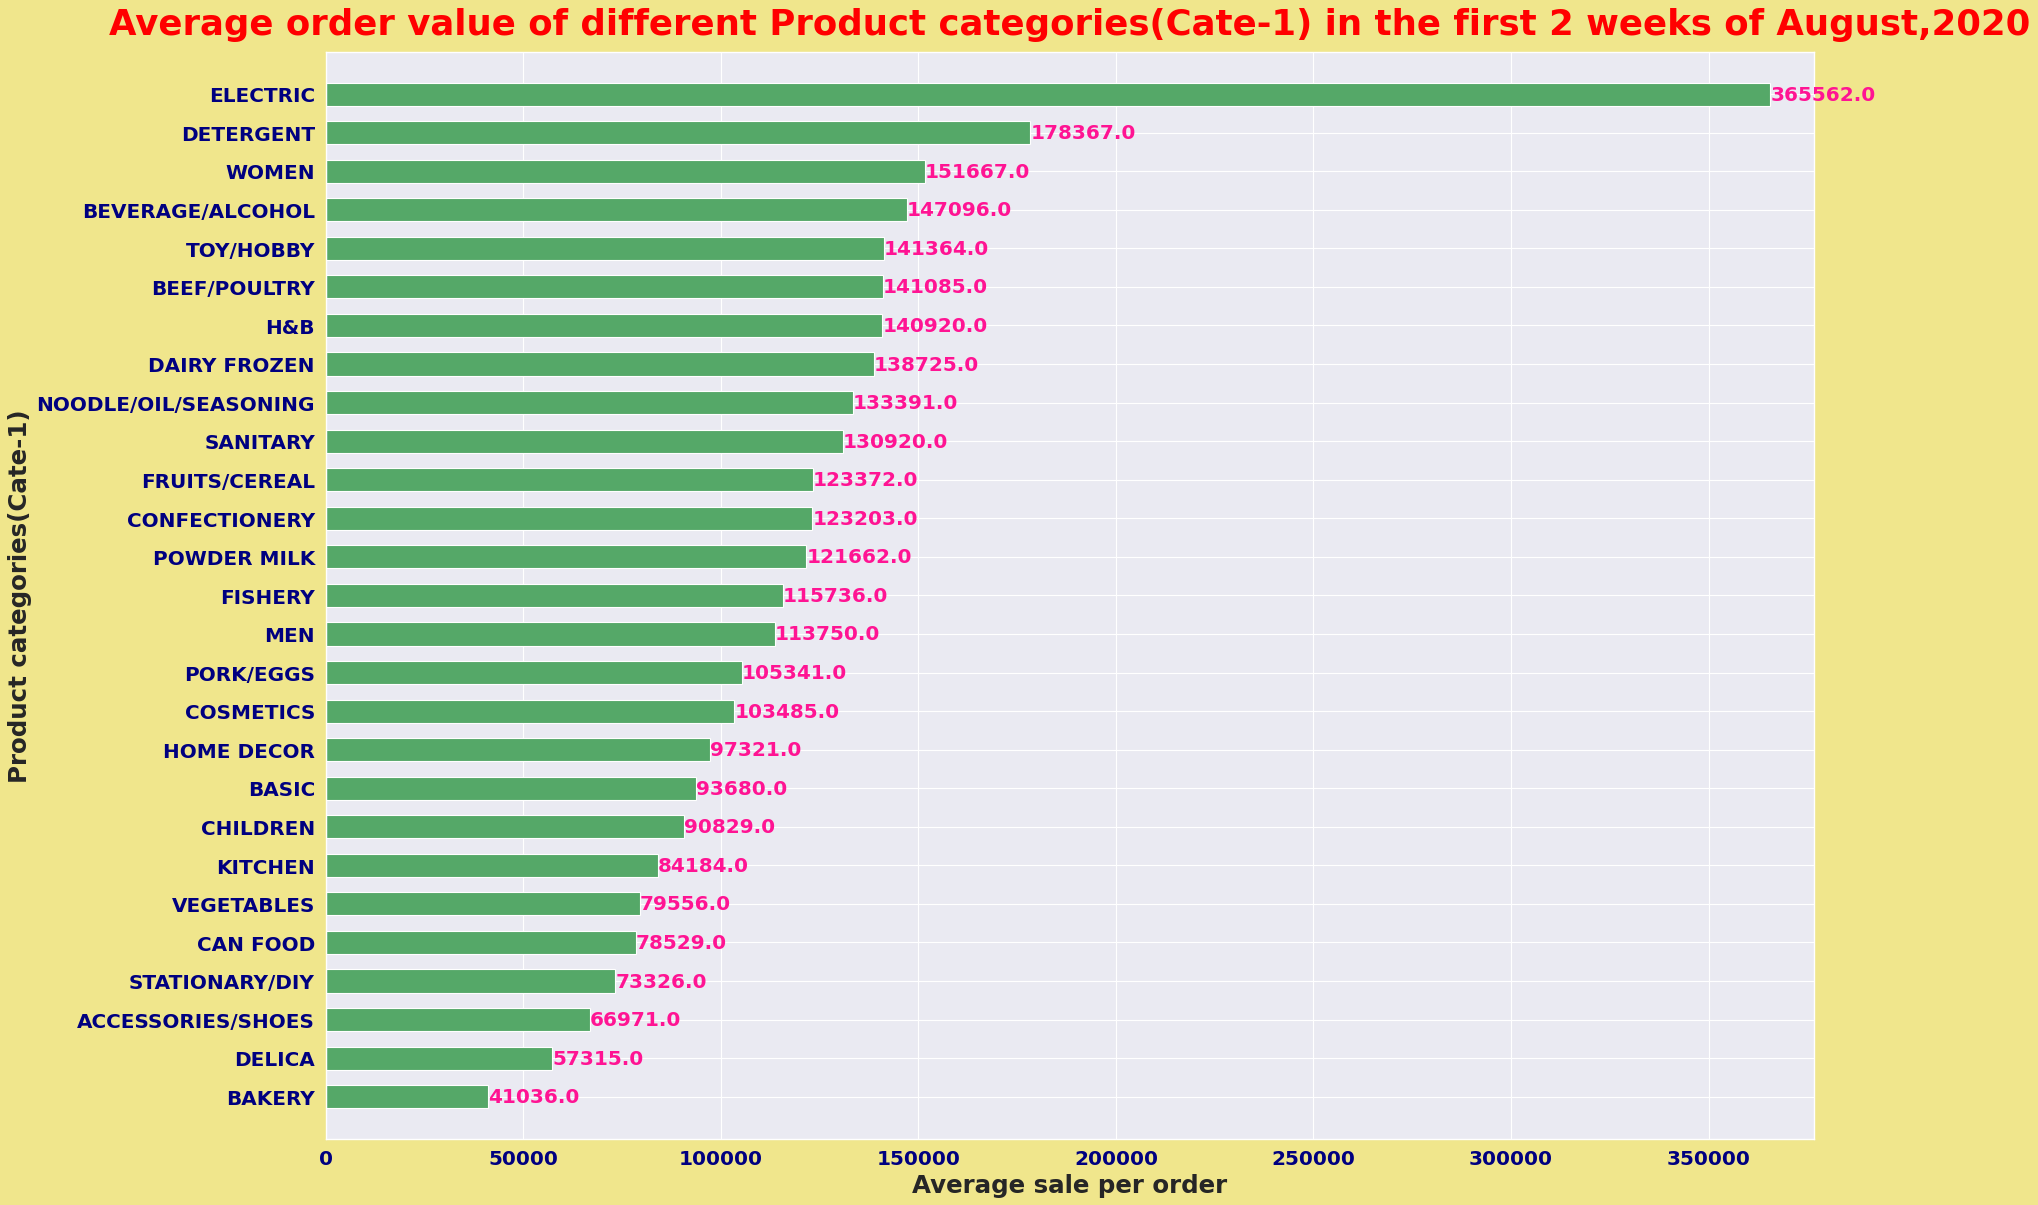

In [25]:
# Determine the average of order value
avg_ordervalue=round(df['Sale amt.1'].sum()/df['Order number'].nunique(),0)
print('The average of order value is',avg_ordervalue,'VND')
# Determine the average order value of Product categories (Cate-1)
Cate1=df.groupby('1-cat nm').agg({'Order number':'nunique','Sale amt.1':'sum','Sale qty':'sum'}).reset_index()
Cate1['Avg_sale/order']=round(Cate1['Sale amt.1']/Cate1['Order number'],0)
## See the overview for numerical data
print('Statistic data for the average value of categories(cate-1) per one order')
display(Cate1['Avg_sale/order'].describe().round())
# Plot the Average order value of different Product categories(Cate-1)in the first 2 weeks of August
Cate1=Cate1.sort_values('Avg_sale/order')
plt.figure(num=None, figsize=(24,18),dpi=80, facecolor='khaki',edgecolor='k')
plt.barh(Cate1['1-cat nm'], Cate1['Avg_sale/order'], color='g', height=0.6)
plt.title('Average order value of different Product categories(Cate-1) in the first 2 weeks of August,2020',color='red',fontsize=32,fontweight='bold',y=1.01)
plt.xlabel('Average sale per order',fontsize=22, fontweight='bold')
plt.ylabel('Product categories(Cate-1)',fontsize=22,fontweight='bold')
plt.xticks(fontsize=18,color='navy',fontweight='bold')
plt.yticks(fontsize=18,color='navy',fontweight='bold')
for i, v in enumerate(Cate1['Avg_sale/order']):
    plt.text(v+0.3, i-.15 , str(v),fontsize = 18, fontweight ='bold', color ='deeppink')
plt.margins(0.03)

The average of order value is **467000 VND**

Based on statistic data, we can conclude that:

* **75%** number of categories(cate-1) having average value in one order is **less than 140000VND** whereas **Electric**  is the one having the highest value ( **≈365562 VND**), **Bakery** is the lowest (**≈41036 VND**).

* The variance (**standard deviation**) in value amongs  different categories is **58787 VND**

>>>*2.4.5  For each product category, how many quantity customers usually buy for 1 purchase?*



Statistic data for the average quantity for each Product category in 1 purchase
count    27.000000
mean      2.851852
std       1.895414
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max      10.000000
Name: Avg_qty/order, dtype: float64


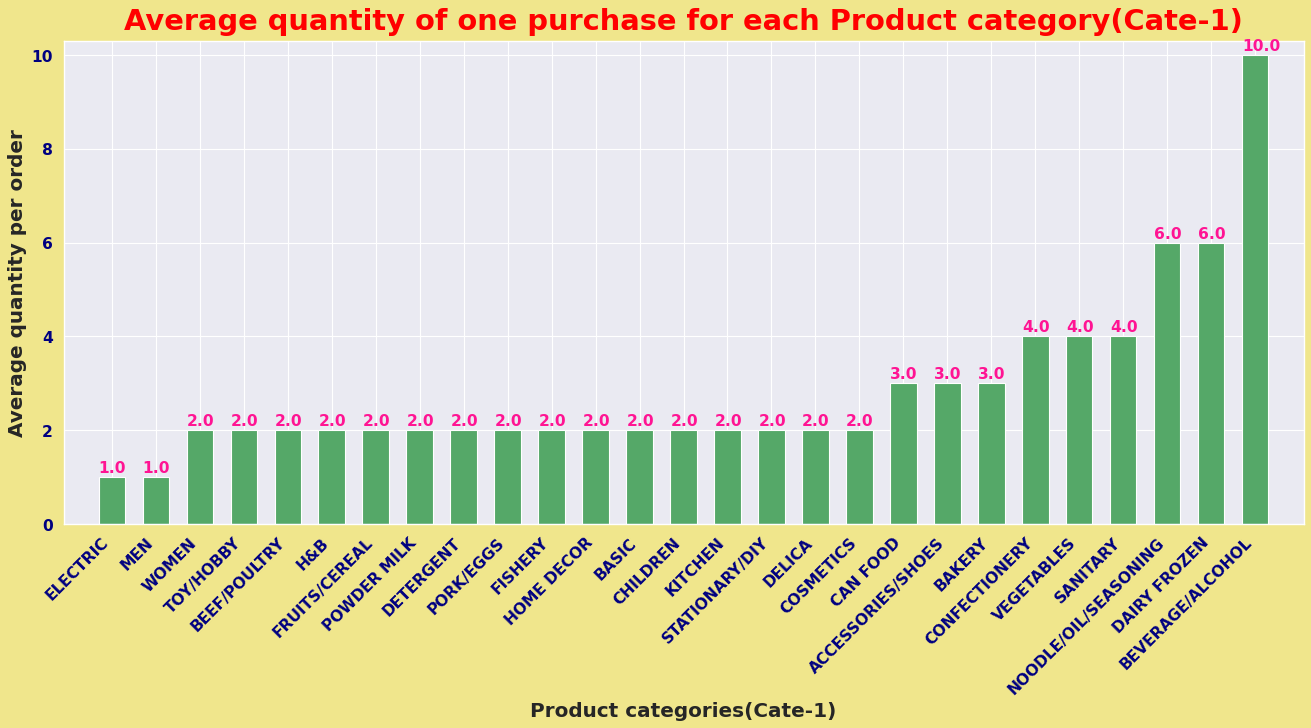

In [26]:
# Determine quantity for each Product category that customer usually buy for 1 purchase
Cate1['Avg_qty/order']=round(Cate1['Sale qty']/Cate1['Order number'],0)
## See the overview for numerical data
print('Statistic data for the average quantity for each Product category in 1 purchase')
print(Cate1['Avg_qty/order'].describe())
# Plot the quantity for each Product category(Cate-1) that customer usually buy for 1 purchase
Cate1=Cate1.sort_values('Avg_qty/order')
plt.figure(num=None, figsize=(20,8),dpi=80, facecolor='khaki',edgecolor='k')
plt.bar(Cate1['1-cat nm'], Cate1['Avg_qty/order'], color='g', width=0.6)
plt.title('Average quantity of one purchase for each Product category(Cate-1)',color='red',fontsize=26,fontweight='bold',y=1.01)
plt.xlabel('Product categories(Cate-1)',fontsize=18, fontweight='bold')
plt.ylabel('Average quantity per order',fontsize=18,fontweight='bold')
plt.xticks(rotation=45,horizontalalignment='right',fontsize=14,color='navy',fontweight='bold')
plt.yticks(fontsize=14,color='navy',fontweight='bold')
for index, value in enumerate(Cate1['Avg_qty/order']):
    plt.text(index-0.3,value+0.1, str(value), fontsize = 14, fontweight ='bold', color ='deeppink')
plt.margins(0.03)

Looking data from above chart, it's easy to see that over **50%** number of categories(cate-1) having average quantity per one order is **2**, **Electric & Men** are the ones having the least purchasing quantity (**1 qty**) whereas **Vegetables** is the highest with average quantity is **10**

>>>*2.4.6  Based on above analyzed data, make an assessment of the forecast to sell for the next 2 weeks*

Data is given in the first 2 weeks of August 2020 ,  based on analyzed above data: sales situation has a gradually decreasing trend along the days in month and shopping is on rise at weekend in cycles. Here, we will use Seasonal adjusted exponential smoothing method (**Holt-Winters Exponential Smoothing**) to forecast the sales in the next 2 weeks as this technique is used for forecasting time series data that exhibits both a trend and a seasonal variation.

In [27]:
# Get information of sales situation by date
Sales_bydate=df.groupby('Sale dt').agg({'Order number':'nunique','Sale qty':'sum','Sale amt.1':'sum'}).reset_index()
Sales_bydate

,Sale dt,Order number,Sale qty,Sale amt.1
0,20200801,1722,28700,863373713
1,20200802,1757,27563,853576650
2,20200803,1611,25487,771405877
3,20200804,1372,21640,650946927
4,20200805,1356,19575,609387383
5,20200806,1349,21218,611429668
6,20200807,1232,18048,577248408
7,20200808,1286,20446,616466427
8,20200809,1251,19416,590501453
9,20200810,1165,18050,528979027


In [28]:
# Set the index frequency explicitly to Daily so that statsmodels does not have to try to infer it -> easy manipulation in further
Sales_bydate = Sales_bydate.set_index('Sale dt')
Sales_bydate.index

Index(['20200801', '20200802', '20200803', '20200804', '20200805', '20200806',
       '20200807', '20200808', '20200809', '20200810', '20200811', '20200812',
       '20200813', '20200814', '20200815'],
      dtype='object', name='Sale dt')

In [29]:
# Getting the "Sale amt.1" information
Sales_bydate_new=Sales_bydate.iloc[:,1]

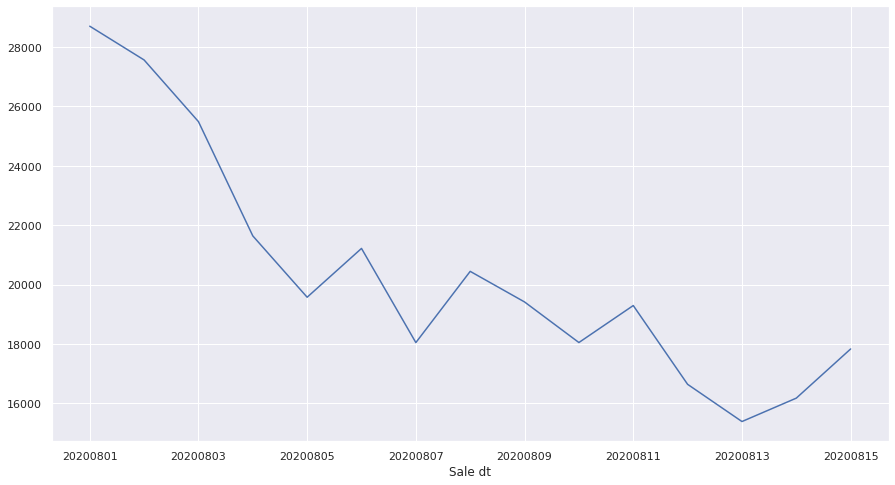

In [30]:
# Plot the data
plt.figure(figsize=(15,8))
Sales_bydate_new.plot()
plt.show()

In [31]:
# Divide into train and validation set
train= Sales_bydate_new[:int(0.94*(len(Sales_bydate_new)))]
test=Sales_bydate_new[int(0.94*(len(Sales_bydate_new))):]

Build and train the model on the training data. In the above chart, the level of the time series seems to be decreasing linearly. So we set the trend as additive. However, the seasonal variation around each level seems to be decreasing in proportion to the current level. So we set the seasonality to multiplicative.

In [32]:
# Import required library
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
# Build and train the model on the training data
model = HWES(train, seasonal_periods=7, trend='add', seasonal='mul')
fitted = model.fit(optimized=True, use_brute=True)
# Print out the training summary
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   14
Model:             ExponentialSmoothing   SSE                      564974530.488
Optimized:                         True   AIC                            267.185
Trend:                         Additive   BIC                            274.215
Seasonal:                Multiplicative   AICC                               inf
Seasonal Periods:                     7   Date:                 Tue, 10 Nov 2020
Box-Cox:                          False   Time:                         09:52:54
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0526316                alpha                 True
smoothing_slope          

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [33]:
# Create an out of sample forcast for the next 14 days (2 weeks) beyond the final data point in the training data set
sales_forecast = fitted.forecast(steps=14)
sales_forecast.index=sales_forecast.index.astype('str')

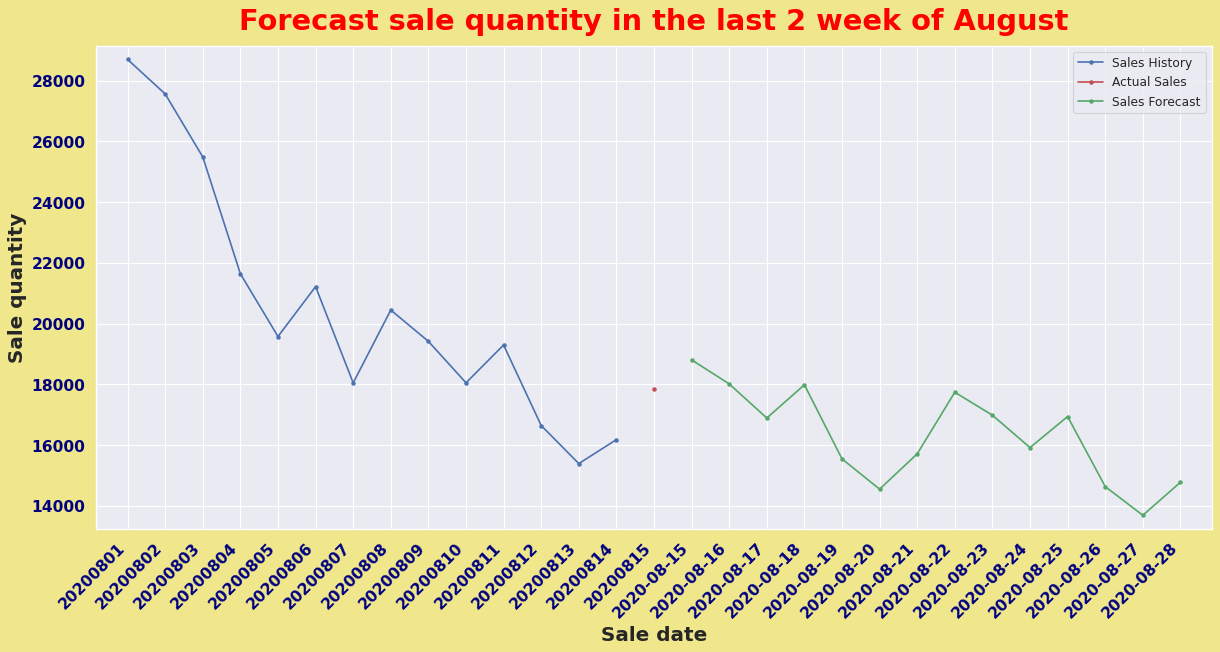

In [34]:
# Plot the training data, the test data and the forecast on the same plot
plt.figure(num=None, figsize=(18,8),dpi=80, facecolor='khaki',edgecolor='k')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light',fontsize='medium')
past, = plt.plot(train.index, train, 'b.-', label='Sales History')
future, = plt.plot(test.index, test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(sales_forecast.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.title('Forecast sale quantity in the last 2 week of August',color='red',fontsize=26,fontweight='bold',y=1.02)
plt.xlabel('Sale date',fontsize=18, fontweight='bold')
plt.ylabel('Sale quantity',fontsize=18,fontweight='bold')
plt.xticks(rotation=45,horizontalalignment='right',fontsize=14,color='navy',fontweight='bold')
plt.yticks(fontsize=14,color='navy',fontweight='bold')
plt.margins(0.03)
plt.legend(handles=[past, future, predicted_future])
plt.show()

We can see that the forecast on August 15th is higher in comparison with actual sale, due to some reasons. In general, sale quantity is predicted to decrease slightly in the last  2 week of August,2020 based on the above analyzed data.

>**3. CONCLUSION**

Some insights obtained based on data analysis above

1. Basic focus is to identify how the sale is happening over the time. The perfect idea we get due to busy delivery system at the time of weekend, people tend to order in Saturday and Sunday for most of the weeks. The steep increase in sales in weekends can also be due to the sale season. Special sale for weekends is always considered as one of the best ideas.
2. Strengthen marketing campaigns in the afternoon hours, especially during from 10am till 16pm in day when customers have high buying demand to increase orders and sales
3. 1001, 1004 and 1012 are the 3 best stores in sales and Dairy frozen is the most best-selling category(Cate-1) in the first 2 weeks of August,2020 
4. For best-selling category (Cate-4) concentrate mainly in FMCG products such as: Vermicelli, Milk ( Milk drink, Yogust, Nuts/Seed milk), Beverage (Pure quater, Lemon drink, Tea drink), Snack, Wet tissue, etc . Specific in products: pure water of Aquafina with various type of volume, Yomost milk with orange, Cuc Da wet tissue, full cream pasteurized fresh milk of Promess, soda water of Swep Sleek,etc   
=> should deald with vendors of these products to get the best price or any better services, etc

 However, there are some differences in consumer prefences in each region
5. The number of orders/customers and sales in the Middle is approximate 1.5 times higher than North despite having the same number of stores (3 stores) 

  => should to investigate and improve it
6. The average of order value is 467000 VND and 75% number of categories(cate-1) having average value in one order is less than 140000VND .The standard deviation in value amongs  different categories is 58787 VND
7.  Over 50% number of categories(cate-1) having average quantity per one order is 2, Electric & Men  have the least purchasing quantity (1 qty) whereas Vegetables is the highest one (10 qty)
8. Sale quantities is forecasted to decrease slightly in the last  2 week of August,2020